In [1]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dropout, Flatten, Dense, BatchNormalization, Reshape, UpSampling2D, Activation
from keras.optimizers import Adam, sgd
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 35
epochs = 50

img_rows, img_cols = 60,70

input_shape = (img_rows, img_cols,1)
def localizeWord(image):
    # localize the word
    start_xL =0
    start_xR = len(img[0])-1
    start_yT = 0
    start_yB = len(img)-1
    minLength = 30
    threshold = 5;

    for i in range(len(img)-minLength):
        sum = 0
        for j in range(len(img[i])):
            sum = sum + img[i][j]
        if sum > threshold:
            break
        start_yT = start_yT + 1
    for i in range(len(img)-1,0,-1):
        sum = 0
        for j in range(len(img[i])):
            sum = sum + img[i][j]
        if sum > threshold:
            break

        start_yB = start_yB - 1
    for i in range(len(img[0])-minLength):
        sum = 0
        for j in range(len(img)):
            sum = sum + img[j][i]
        if sum > threshold:
            break
        start_xL = start_xL + 1
    for i in range(len(img[0])-1,0,-1):
        sum = 0
        for j in range(len(img)):
            sum = sum + img[j][i]
        if sum > threshold:
            break
        start_xR = start_xR - 1
#    print(start_yT,start_yB)
 #   print(start_xL,start_xR)
    image = image[start_yT:start_yB]
    #for j in range(len(img)):
    return image
        
        
        
        

        
    
    


Using TensorFlow backend.


In [27]:
from skimage import io
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.transform import resize
import csv
from keras.models import load_model
import h5py
X_train = []
y_train = []
X_test = []
y_test = []

image_coll = ['ahad','ahda','ethna','one','two','three','four','five','six','seven','eight','nine','ten',
              'twenty','thirty','fourty','fifty','sixty','seventy','eighty','ninety',
              'hundered','twoh','threeh','fourh','fiveh','sixh','sevenh','eighth','nineh',
              'thousand','twoth','thousands','milion','ryal']

print('test')
output = 0
    
for collections in image_coll:
    print('loading images: ' + collections)
    coll = io.ImageCollection('../Datav2/numbers/' + collections + '/*.tif')
    TempX = []
    Tempy = []
    for img in coll:
        #img = localizeWord(img)
        TempX.append(resize(img,(img_rows,img_cols,1)))
        # invert color of greyscale
        for i in range(len(TempX[-1])):
            for j in range(len(TempX[-1][i])):
                TempX[-1][i][j] = abs(1 - TempX[-1][i][j])
        
        Tempy.append(output)
    # split dataset to train and test 
    X_train = X_train + TempX[0:int(len(TempX)*0.80)]
    y_train = y_train + Tempy[0:int(len(TempX)*0.80)]
    X_test = X_test + TempX[int(len(TempX)*0.90):]
    y_test = y_test + Tempy[int(len(TempX)*0.90):]
    print(len(X_train),len(X_test),"total")

    TempX = []
    Tempy = []

    
    coll = io.ImageCollection('../Datav2/numbers/' + collections + '/output/*.tif')
    for img in coll:
        #img = localizeWord(img)
        TempX.append(resize(img,(img_rows,img_cols,1)))
        Tempy.append(output)
    # split dataset to train and test         
    X_train = X_train + TempX[0:int(len(TempX)*0.80)]
    y_train = y_train + Tempy[0:int(len(TempX)*0.80)]
    X_test = X_test + TempX[int(len(TempX)*0.90):]
    y_test = y_test + Tempy[int(len(TempX)*0.90):]
    print(len(X_train),len(X_test),"total")
    
    output = output + 1

print("finished loading...\n")        
# convet to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)

test
loading images: ahad


c:\users\mohamed atta\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


82 11 total
1282 161 total
loading images: ahda
1364 172 total
2564 322 total
loading images: ethna
2647 333 total
3847 483 total
loading images: one
3930 494 total
5130 644 total
loading images: two
5298 665 total
6498 815 total
loading images: three
6666 836 total
7866 986 total
loading images: four
8033 1007 total
9233 1157 total
loading images: five
9400 1178 total
10600 1328 total
loading images: six
10767 1349 total
11967 1499 total
loading images: seven
12135 1520 total
13335 1670 total
loading images: eight
13501 1691 total
14701 1841 total
loading images: nine
14868 1862 total
15863 1987 total
loading images: ten
16030 2008 total
17230 2158 total
loading images: twenty
17398 2179 total
18598 2329 total
loading images: thirty
18764 2350 total
19691 2466 total
loading images: fourty
19858 2487 total
21058 2637 total
loading images: fifty
21225 2658 total
22425 2808 total
loading images: sixty
22592 2829 total
23792 2979 total
loading images: seventy
23959 3000 total
25159 3150 t

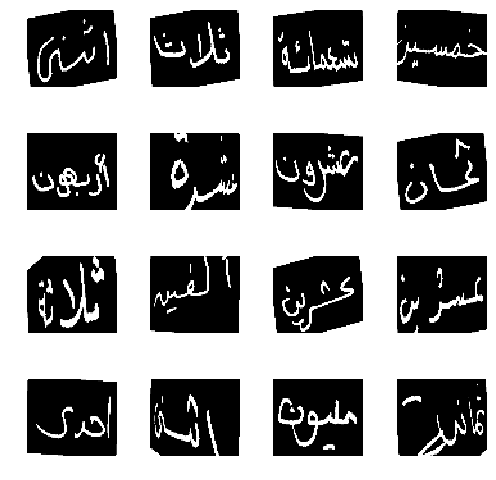

In [28]:
index = np.random.choice(X_train.shape[0],16)
samples = X_train[index,:,:,:]
plt.figure(figsize=(7,7))
for i in range(samples.shape[0]):
    plt.subplot(4,4,i+1)
    img = samples[i,:,:,0]
    plt.imshow(img,interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
print(len(X_train[0][0]))
print(X_train[0][10])

#X_train /= 255

print(np.min(X_train), np.max(X_train))
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

channels_last
70
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
0.0 1.0
X_train shape: (44218, 60, 70, 1)
44218 train samples


In [30]:
print(len(y_test))
print(len(y_train))
print(y_train[4000])
print(y_test[4000])

print(max(y_train))
print(max(y_test))

5539
44218
3
23
34
34


In [31]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [36]:
print(len(y_test))
print(len(y_train))
print(y_train[4000])
print(y_test[4000])

epochs = 50

5539
44218
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 44218 samples, validate on 5539 samples
Epoch 1/50


25984/44218 [================>.............] - ETA: 35:21 - loss: 3.5647 - acc: 0.03 - ETA: 33:17 - loss: 3.5708 - acc: 0.03 - ETA: 32:28 - loss: 3.5679 - acc: 0.03 - ETA: 32:01 - loss: 3.5595 - acc: 0.03 - ETA: 31:42 - loss: 3.5588 - acc: 0.03 - ETA: 31:28 - loss: 3.5562 - acc: 0.03 - ETA: 31:31 - loss: 3.5555 - acc: 0.03 - ETA: 31:20 - loss: 3.5540 - acc: 0.03 - ETA: 31:11 - loss: 3.5526 - acc: 0.03 - ETA: 31:02 - loss: 3.5562 - acc: 0.03 - ETA: 30:54 - loss: 3.5559 - acc: 0.03 - ETA: 30:45 - loss: 3.5552 - acc: 0.03 - ETA: 30:38 - loss: 3.5555 - acc: 0.03 - ETA: 30:30 - loss: 3.5553 - acc: 0.03 - ETA: 30:24 - loss: 3.5552 - acc: 0.03 - ETA: 30:18 - loss: 3.5564 - acc: 0.03 - ETA: 30:11 - loss: 3.5566 - acc: 0.03 - ETA: 30:05 - loss: 3.5565 - acc: 0.03 - ETA: 29:59 - loss: 3.5559 - acc: 0.03 - ETA: 29:53 - loss: 3.5554 - acc: 0.03 - ETA: 29:47 - loss: 3.5545 - acc: 0.03 - ETA: 29:41 - loss: 3.5539 - acc: 0.03 - ETA: 29:35 - loss: 3.5524 - acc: 0.03 - ETA: 29:29 - loss: 3.5524 - acc: 

26112/44218 [================>.............] - ETA: 30:44 - loss: 2.1293 - acc: 0.39 - ETA: 31:15 - loss: 1.9715 - acc: 0.44 - ETA: 31:32 - loss: 1.8995 - acc: 0.47 - ETA: 31:27 - loss: 1.8663 - acc: 0.50 - ETA: 31:20 - loss: 1.8495 - acc: 0.49 - ETA: 31:13 - loss: 1.8448 - acc: 0.49 - ETA: 31:07 - loss: 1.8487 - acc: 0.50 - ETA: 31:14 - loss: 1.8253 - acc: 0.50 - ETA: 31:07 - loss: 1.8439 - acc: 0.49 - ETA: 31:05 - loss: 1.8741 - acc: 0.48 - ETA: 30:58 - loss: 1.8980 - acc: 0.47 - ETA: 30:51 - loss: 1.8881 - acc: 0.47 - ETA: 30:54 - loss: 1.8750 - acc: 0.47 - ETA: 30:47 - loss: 1.8792 - acc: 0.47 - ETA: 30:40 - loss: 1.8810 - acc: 0.46 - ETA: 30:35 - loss: 1.8643 - acc: 0.47 - ETA: 30:29 - loss: 1.8457 - acc: 0.47 - ETA: 30:22 - loss: 1.8550 - acc: 0.47 - ETA: 30:16 - loss: 1.8406 - acc: 0.48 - ETA: 30:17 - loss: 1.8386 - acc: 0.48 - ETA: 30:10 - loss: 1.8338 - acc: 0.48 - ETA: 30:01 - loss: 1.8238 - acc: 0.48 - ETA: 29:52 - loss: 1.8203 - acc: 0.48 - ETA: 29:45 - loss: 1.8055 - acc: 

44218/44218 [==============================] - ETA: 12:38 - loss: 1.5780 - acc: 0.54 - ETA: 12:33 - loss: 1.5770 - acc: 0.54 - ETA: 12:28 - loss: 1.5759 - acc: 0.54 - ETA: 12:22 - loss: 1.5754 - acc: 0.54 - ETA: 12:17 - loss: 1.5746 - acc: 0.54 - ETA: 12:11 - loss: 1.5732 - acc: 0.54 - ETA: 12:07 - loss: 1.5734 - acc: 0.54 - ETA: 12:02 - loss: 1.5731 - acc: 0.54 - ETA: 11:58 - loss: 1.5712 - acc: 0.54 - ETA: 11:53 - loss: 1.5704 - acc: 0.54 - ETA: 11:49 - loss: 1.5694 - acc: 0.54 - ETA: 11:43 - loss: 1.5674 - acc: 0.54 - ETA: 11:39 - loss: 1.5668 - acc: 0.54 - ETA: 11:34 - loss: 1.5665 - acc: 0.54 - ETA: 11:29 - loss: 1.5652 - acc: 0.54 - ETA: 11:24 - loss: 1.5636 - acc: 0.54 - ETA: 11:19 - loss: 1.5643 - acc: 0.54 - ETA: 11:14 - loss: 1.5642 - acc: 0.54 - ETA: 11:09 - loss: 1.5629 - acc: 0.54 - ETA: 11:04 - loss: 1.5624 - acc: 0.54 - ETA: 10:58 - loss: 1.5612 - acc: 0.54 - ETA: 10:53 - loss: 1.5606 - acc: 0.54 - ETA: 10:48 - loss: 1.5589 - acc: 0.54 - ETA: 10:42 - loss: 1.5580 - acc: 

26112/44218 [================>.............] - ETA: 30:28 - loss: 1.0955 - acc: 0.69 - ETA: 30:25 - loss: 1.1317 - acc: 0.68 - ETA: 30:20 - loss: 1.1628 - acc: 0.65 - ETA: 30:15 - loss: 1.1900 - acc: 0.64 - ETA: 30:11 - loss: 1.1516 - acc: 0.65 - ETA: 30:05 - loss: 1.1548 - acc: 0.65 - ETA: 29:59 - loss: 1.1596 - acc: 0.64 - ETA: 29:56 - loss: 1.1683 - acc: 0.64 - ETA: 29:50 - loss: 1.1582 - acc: 0.65 - ETA: 29:45 - loss: 1.1388 - acc: 0.65 - ETA: 29:39 - loss: 1.1474 - acc: 0.65 - ETA: 29:35 - loss: 1.1491 - acc: 0.64 - ETA: 29:29 - loss: 1.1430 - acc: 0.65 - ETA: 29:23 - loss: 1.1357 - acc: 0.65 - ETA: 29:18 - loss: 1.1519 - acc: 0.65 - ETA: 29:13 - loss: 1.1523 - acc: 0.65 - ETA: 29:08 - loss: 1.1400 - acc: 0.65 - ETA: 29:03 - loss: 1.1366 - acc: 0.65 - ETA: 28:58 - loss: 1.1395 - acc: 0.65 - ETA: 28:53 - loss: 1.1400 - acc: 0.66 - ETA: 28:48 - loss: 1.1390 - acc: 0.65 - ETA: 28:43 - loss: 1.1287 - acc: 0.66 - ETA: 28:38 - loss: 1.1235 - acc: 0.66 - ETA: 28:34 - loss: 1.1144 - acc: 

26112/44218 [================>.............] - ETA: 31:30 - loss: 0.8484 - acc: 0.75 - ETA: 31:37 - loss: 0.9032 - acc: 0.72 - ETA: 31:59 - loss: 0.8946 - acc: 0.72 - ETA: 31:53 - loss: 0.8677 - acc: 0.73 - ETA: 31:37 - loss: 0.8568 - acc: 0.73 - ETA: 31:27 - loss: 0.8237 - acc: 0.74 - ETA: 31:30 - loss: 0.8097 - acc: 0.74 - ETA: 31:18 - loss: 0.8075 - acc: 0.74 - ETA: 31:10 - loss: 0.7962 - acc: 0.74 - ETA: 31:00 - loss: 0.8219 - acc: 0.74 - ETA: 30:51 - loss: 0.8271 - acc: 0.74 - ETA: 30:49 - loss: 0.8210 - acc: 0.74 - ETA: 30:41 - loss: 0.8172 - acc: 0.74 - ETA: 30:33 - loss: 0.8373 - acc: 0.74 - ETA: 30:26 - loss: 0.8441 - acc: 0.73 - ETA: 30:24 - loss: 0.8516 - acc: 0.73 - ETA: 30:17 - loss: 0.8584 - acc: 0.73 - ETA: 30:10 - loss: 0.8564 - acc: 0.73 - ETA: 30:03 - loss: 0.8515 - acc: 0.73 - ETA: 29:59 - loss: 0.8544 - acc: 0.73 - ETA: 29:52 - loss: 0.8462 - acc: 0.73 - ETA: 29:45 - loss: 0.8495 - acc: 0.73 - ETA: 29:38 - loss: 0.8398 - acc: 0.74 - ETA: 29:33 - loss: 0.8392 - acc: 

44218/44218 [==============================] - ETA: 12:50 - loss: 0.8307 - acc: 0.75 - ETA: 12:45 - loss: 0.8312 - acc: 0.75 - ETA: 12:39 - loss: 0.8302 - acc: 0.75 - ETA: 12:34 - loss: 0.8289 - acc: 0.75 - ETA: 12:28 - loss: 0.8279 - acc: 0.75 - ETA: 12:23 - loss: 0.8276 - acc: 0.75 - ETA: 12:17 - loss: 0.8265 - acc: 0.75 - ETA: 12:13 - loss: 0.8262 - acc: 0.75 - ETA: 12:08 - loss: 0.8261 - acc: 0.75 - ETA: 12:04 - loss: 0.8256 - acc: 0.75 - ETA: 12:00 - loss: 0.8263 - acc: 0.75 - ETA: 11:55 - loss: 0.8261 - acc: 0.75 - ETA: 11:50 - loss: 0.8262 - acc: 0.75 - ETA: 11:45 - loss: 0.8258 - acc: 0.75 - ETA: 11:39 - loss: 0.8247 - acc: 0.75 - ETA: 11:34 - loss: 0.8245 - acc: 0.75 - ETA: 11:28 - loss: 0.8237 - acc: 0.75 - ETA: 11:23 - loss: 0.8225 - acc: 0.75 - ETA: 11:17 - loss: 0.8214 - acc: 0.75 - ETA: 11:12 - loss: 0.8208 - acc: 0.75 - ETA: 11:07 - loss: 0.8205 - acc: 0.75 - ETA: 11:02 - loss: 0.8211 - acc: 0.75 - ETA: 10:57 - loss: 0.8207 - acc: 0.75 - ETA: 10:52 - loss: 0.8209 - acc: 

26112/44218 [================>.............] - ETA: 31:27 - loss: 0.7642 - acc: 0.78 - ETA: 31:24 - loss: 0.6861 - acc: 0.79 - ETA: 31:20 - loss: 0.6892 - acc: 0.78 - ETA: 31:16 - loss: 0.6740 - acc: 0.80 - ETA: 31:25 - loss: 0.6858 - acc: 0.80 - ETA: 31:22 - loss: 0.6644 - acc: 0.81 - ETA: 31:14 - loss: 0.6849 - acc: 0.80 - ETA: 31:08 - loss: 0.6991 - acc: 0.79 - ETA: 31:02 - loss: 0.6950 - acc: 0.79 - ETA: 30:57 - loss: 0.7031 - acc: 0.79 - ETA: 30:50 - loss: 0.6899 - acc: 0.79 - ETA: 30:44 - loss: 0.6884 - acc: 0.79 - ETA: 30:38 - loss: 0.6968 - acc: 0.79 - ETA: 30:40 - loss: 0.6983 - acc: 0.79 - ETA: 30:33 - loss: 0.6970 - acc: 0.79 - ETA: 30:27 - loss: 0.6988 - acc: 0.79 - ETA: 30:21 - loss: 0.6918 - acc: 0.79 - ETA: 30:15 - loss: 0.6899 - acc: 0.79 - ETA: 30:09 - loss: 0.6886 - acc: 0.79 - ETA: 30:03 - loss: 0.6919 - acc: 0.79 - ETA: 29:57 - loss: 0.6937 - acc: 0.79 - ETA: 29:51 - loss: 0.6929 - acc: 0.79 - ETA: 29:48 - loss: 0.7084 - acc: 0.79 - ETA: 29:42 - loss: 0.7042 - acc: 

26112/44218 [================>.............] - ETA: 31:13 - loss: 0.8053 - acc: 0.77 - ETA: 31:10 - loss: 0.7168 - acc: 0.78 - ETA: 31:07 - loss: 0.7141 - acc: 0.78 - ETA: 31:02 - loss: 0.6952 - acc: 0.79 - ETA: 30:54 - loss: 0.6905 - acc: 0.78 - ETA: 30:49 - loss: 0.7205 - acc: 0.77 - ETA: 30:45 - loss: 0.7084 - acc: 0.78 - ETA: 30:51 - loss: 0.7038 - acc: 0.78 - ETA: 30:53 - loss: 0.7076 - acc: 0.78 - ETA: 30:49 - loss: 0.7064 - acc: 0.78 - ETA: 30:42 - loss: 0.6835 - acc: 0.79 - ETA: 30:35 - loss: 0.6935 - acc: 0.79 - ETA: 30:29 - loss: 0.6798 - acc: 0.79 - ETA: 30:23 - loss: 0.6679 - acc: 0.79 - ETA: 30:17 - loss: 0.6674 - acc: 0.79 - ETA: 30:16 - loss: 0.6526 - acc: 0.80 - ETA: 30:16 - loss: 0.6496 - acc: 0.80 - ETA: 30:12 - loss: 0.6420 - acc: 0.80 - ETA: 30:08 - loss: 0.6495 - acc: 0.80 - ETA: 30:03 - loss: 0.6477 - acc: 0.80 - ETA: 29:57 - loss: 0.6429 - acc: 0.80 - ETA: 29:51 - loss: 0.6401 - acc: 0.80 - ETA: 29:45 - loss: 0.6414 - acc: 0.80 - ETA: 29:39 - loss: 0.6426 - acc: 

44218/44218 [==============================] - ETA: 12:56 - loss: 0.5995 - acc: 0.81 - ETA: 12:51 - loss: 0.5991 - acc: 0.81 - ETA: 12:45 - loss: 0.5985 - acc: 0.81 - ETA: 12:40 - loss: 0.5987 - acc: 0.81 - ETA: 12:35 - loss: 0.5985 - acc: 0.81 - ETA: 12:29 - loss: 0.5978 - acc: 0.81 - ETA: 12:24 - loss: 0.5977 - acc: 0.81 - ETA: 12:18 - loss: 0.5981 - acc: 0.81 - ETA: 12:13 - loss: 0.5974 - acc: 0.81 - ETA: 12:07 - loss: 0.5973 - acc: 0.81 - ETA: 12:01 - loss: 0.5972 - acc: 0.81 - ETA: 11:56 - loss: 0.5964 - acc: 0.81 - ETA: 11:50 - loss: 0.5962 - acc: 0.81 - ETA: 11:45 - loss: 0.5959 - acc: 0.81 - ETA: 11:39 - loss: 0.5958 - acc: 0.81 - ETA: 11:34 - loss: 0.5958 - acc: 0.81 - ETA: 11:28 - loss: 0.5956 - acc: 0.81 - ETA: 11:23 - loss: 0.5956 - acc: 0.81 - ETA: 11:17 - loss: 0.5947 - acc: 0.81 - ETA: 11:11 - loss: 0.5950 - acc: 0.81 - ETA: 11:06 - loss: 0.5950 - acc: 0.81 - ETA: 11:00 - loss: 0.5950 - acc: 0.81 - ETA: 10:55 - loss: 0.5954 - acc: 0.81 - ETA: 10:49 - loss: 0.5954 - acc: 

26112/44218 [================>.............] - ETA: 32:38 - loss: 0.5577 - acc: 0.81 - ETA: 32:42 - loss: 0.5461 - acc: 0.81 - ETA: 32:12 - loss: 0.5945 - acc: 0.80 - ETA: 31:50 - loss: 0.5578 - acc: 0.81 - ETA: 31:37 - loss: 0.5535 - acc: 0.81 - ETA: 31:27 - loss: 0.5316 - acc: 0.82 - ETA: 31:16 - loss: 0.5231 - acc: 0.83 - ETA: 31:07 - loss: 0.5283 - acc: 0.83 - ETA: 30:58 - loss: 0.5410 - acc: 0.82 - ETA: 30:51 - loss: 0.5479 - acc: 0.82 - ETA: 30:54 - loss: 0.5384 - acc: 0.83 - ETA: 30:47 - loss: 0.5381 - acc: 0.83 - ETA: 30:40 - loss: 0.5406 - acc: 0.83 - ETA: 30:34 - loss: 0.5430 - acc: 0.83 - ETA: 30:27 - loss: 0.5356 - acc: 0.83 - ETA: 30:22 - loss: 0.5286 - acc: 0.84 - ETA: 30:15 - loss: 0.5289 - acc: 0.83 - ETA: 30:09 - loss: 0.5226 - acc: 0.84 - ETA: 30:03 - loss: 0.5247 - acc: 0.84 - ETA: 29:59 - loss: 0.5207 - acc: 0.84 - ETA: 29:55 - loss: 0.5153 - acc: 0.84 - ETA: 29:49 - loss: 0.5167 - acc: 0.84 - ETA: 29:42 - loss: 0.5102 - acc: 0.84 - ETA: 29:36 - loss: 0.5118 - acc: 

26112/44218 [================>.............] - ETA: 30:56 - loss: 0.4515 - acc: 0.85 - ETA: 31:00 - loss: 0.4916 - acc: 0.85 - ETA: 30:52 - loss: 0.4954 - acc: 0.85 - ETA: 30:45 - loss: 0.5237 - acc: 0.84 - ETA: 30:38 - loss: 0.4965 - acc: 0.85 - ETA: 30:34 - loss: 0.4928 - acc: 0.85 - ETA: 30:29 - loss: 0.4988 - acc: 0.84 - ETA: 30:23 - loss: 0.4810 - acc: 0.85 - ETA: 30:17 - loss: 0.4840 - acc: 0.85 - ETA: 30:11 - loss: 0.4955 - acc: 0.85 - ETA: 30:07 - loss: 0.4994 - acc: 0.84 - ETA: 30:02 - loss: 0.4913 - acc: 0.85 - ETA: 30:00 - loss: 0.4851 - acc: 0.84 - ETA: 29:57 - loss: 0.4843 - acc: 0.84 - ETA: 29:53 - loss: 0.4856 - acc: 0.84 - ETA: 29:47 - loss: 0.4959 - acc: 0.84 - ETA: 29:43 - loss: 0.4891 - acc: 0.84 - ETA: 29:36 - loss: 0.4914 - acc: 0.84 - ETA: 29:32 - loss: 0.4914 - acc: 0.84 - ETA: 29:26 - loss: 0.4909 - acc: 0.84 - ETA: 29:20 - loss: 0.4937 - acc: 0.84 - ETA: 29:14 - loss: 0.4916 - acc: 0.84 - ETA: 29:09 - loss: 0.4852 - acc: 0.85 - ETA: 29:03 - loss: 0.4944 - acc: 

44218/44218 [==============================] - ETA: 12:36 - loss: 0.4897 - acc: 0.84 - ETA: 12:31 - loss: 0.4891 - acc: 0.84 - ETA: 12:26 - loss: 0.4897 - acc: 0.84 - ETA: 12:20 - loss: 0.4896 - acc: 0.84 - ETA: 12:15 - loss: 0.4898 - acc: 0.84 - ETA: 12:09 - loss: 0.4894 - acc: 0.84 - ETA: 12:04 - loss: 0.4889 - acc: 0.84 - ETA: 11:58 - loss: 0.4893 - acc: 0.84 - ETA: 11:53 - loss: 0.4890 - acc: 0.84 - ETA: 11:48 - loss: 0.4881 - acc: 0.84 - ETA: 11:42 - loss: 0.4871 - acc: 0.84 - ETA: 11:37 - loss: 0.4870 - acc: 0.84 - ETA: 11:31 - loss: 0.4869 - acc: 0.84 - ETA: 11:26 - loss: 0.4865 - acc: 0.84 - ETA: 11:21 - loss: 0.4857 - acc: 0.84 - ETA: 11:15 - loss: 0.4857 - acc: 0.84 - ETA: 11:10 - loss: 0.4859 - acc: 0.84 - ETA: 11:04 - loss: 0.4863 - acc: 0.84 - ETA: 10:59 - loss: 0.4867 - acc: 0.84 - ETA: 10:54 - loss: 0.4872 - acc: 0.84 - ETA: 10:48 - loss: 0.4874 - acc: 0.84 - ETA: 10:43 - loss: 0.4866 - acc: 0.84 - ETA: 10:37 - loss: 0.4865 - acc: 0.84 - ETA: 10:32 - loss: 0.4863 - acc: 

26112/44218 [================>.............] - ETA: 30:33 - loss: 0.3668 - acc: 0.87 - ETA: 30:32 - loss: 0.4190 - acc: 0.85 - ETA: 30:35 - loss: 0.4415 - acc: 0.85 - ETA: 30:30 - loss: 0.4304 - acc: 0.86 - ETA: 30:26 - loss: 0.4095 - acc: 0.87 - ETA: 30:20 - loss: 0.4163 - acc: 0.86 - ETA: 30:14 - loss: 0.4402 - acc: 0.86 - ETA: 30:09 - loss: 0.4329 - acc: 0.87 - ETA: 30:03 - loss: 0.4371 - acc: 0.86 - ETA: 29:57 - loss: 0.4308 - acc: 0.86 - ETA: 29:52 - loss: 0.4377 - acc: 0.86 - ETA: 29:46 - loss: 0.4290 - acc: 0.86 - ETA: 29:39 - loss: 0.4292 - acc: 0.86 - ETA: 29:34 - loss: 0.4358 - acc: 0.86 - ETA: 29:27 - loss: 0.4346 - acc: 0.86 - ETA: 29:21 - loss: 0.4404 - acc: 0.86 - ETA: 29:14 - loss: 0.4442 - acc: 0.86 - ETA: 29:08 - loss: 0.4485 - acc: 0.86 - ETA: 29:02 - loss: 0.4476 - acc: 0.86 - ETA: 28:55 - loss: 0.4434 - acc: 0.86 - ETA: 28:50 - loss: 0.4414 - acc: 0.86 - ETA: 28:45 - loss: 0.4389 - acc: 0.86 - ETA: 28:40 - loss: 0.4406 - acc: 0.86 - ETA: 28:34 - loss: 0.4405 - acc: 

26112/44218 [================>.............] - ETA: 31:02 - loss: 0.3694 - acc: 0.85 - ETA: 31:04 - loss: 0.3896 - acc: 0.85 - ETA: 30:58 - loss: 0.3987 - acc: 0.86 - ETA: 30:53 - loss: 0.3995 - acc: 0.86 - ETA: 30:49 - loss: 0.4182 - acc: 0.85 - ETA: 30:44 - loss: 0.4175 - acc: 0.86 - ETA: 30:40 - loss: 0.4251 - acc: 0.86 - ETA: 30:34 - loss: 0.4317 - acc: 0.86 - ETA: 30:30 - loss: 0.4265 - acc: 0.86 - ETA: 30:32 - loss: 0.4111 - acc: 0.86 - ETA: 30:26 - loss: 0.4062 - acc: 0.86 - ETA: 30:23 - loss: 0.4023 - acc: 0.87 - ETA: 30:23 - loss: 0.4051 - acc: 0.87 - ETA: 30:18 - loss: 0.4032 - acc: 0.87 - ETA: 30:12 - loss: 0.3949 - acc: 0.87 - ETA: 30:05 - loss: 0.3976 - acc: 0.87 - ETA: 29:59 - loss: 0.3965 - acc: 0.87 - ETA: 29:54 - loss: 0.3907 - acc: 0.87 - ETA: 29:47 - loss: 0.3933 - acc: 0.87 - ETA: 29:41 - loss: 0.3925 - acc: 0.87 - ETA: 29:36 - loss: 0.3905 - acc: 0.87 - ETA: 29:30 - loss: 0.3863 - acc: 0.87 - ETA: 29:24 - loss: 0.3889 - acc: 0.87 - ETA: 29:18 - loss: 0.3893 - acc: 

44218/44218 [==============================] - ETA: 13:06 - loss: 0.3931 - acc: 0.87 - ETA: 13:00 - loss: 0.3931 - acc: 0.87 - ETA: 12:55 - loss: 0.3930 - acc: 0.87 - ETA: 12:49 - loss: 0.3928 - acc: 0.87 - ETA: 12:44 - loss: 0.3926 - acc: 0.87 - ETA: 12:38 - loss: 0.3928 - acc: 0.87 - ETA: 12:32 - loss: 0.3925 - acc: 0.87 - ETA: 12:27 - loss: 0.3925 - acc: 0.87 - ETA: 12:21 - loss: 0.3925 - acc: 0.87 - ETA: 12:16 - loss: 0.3923 - acc: 0.87 - ETA: 12:10 - loss: 0.3925 - acc: 0.87 - ETA: 12:05 - loss: 0.3924 - acc: 0.87 - ETA: 11:59 - loss: 0.3927 - acc: 0.87 - ETA: 11:53 - loss: 0.3922 - acc: 0.87 - ETA: 11:48 - loss: 0.3927 - acc: 0.87 - ETA: 11:42 - loss: 0.3932 - acc: 0.87 - ETA: 11:37 - loss: 0.3935 - acc: 0.87 - ETA: 11:31 - loss: 0.3937 - acc: 0.87 - ETA: 11:25 - loss: 0.3936 - acc: 0.87 - ETA: 11:20 - loss: 0.3934 - acc: 0.87 - ETA: 11:14 - loss: 0.3937 - acc: 0.87 - ETA: 11:09 - loss: 0.3941 - acc: 0.87 - ETA: 11:03 - loss: 0.3948 - acc: 0.87 - ETA: 10:58 - loss: 0.3947 - acc: 

26112/44218 [================>.............] - ETA: 32:04 - loss: 0.3636 - acc: 0.88 - ETA: 31:54 - loss: 0.3845 - acc: 0.87 - ETA: 32:22 - loss: 0.4015 - acc: 0.87 - ETA: 32:33 - loss: 0.3654 - acc: 0.89 - ETA: 32:22 - loss: 0.3755 - acc: 0.88 - ETA: 32:13 - loss: 0.3721 - acc: 0.89 - ETA: 32:03 - loss: 0.3717 - acc: 0.88 - ETA: 31:55 - loss: 0.3659 - acc: 0.88 - ETA: 31:52 - loss: 0.3584 - acc: 0.89 - ETA: 31:45 - loss: 0.3600 - acc: 0.88 - ETA: 31:37 - loss: 0.3574 - acc: 0.88 - ETA: 31:28 - loss: 0.3598 - acc: 0.88 - ETA: 31:27 - loss: 0.3550 - acc: 0.89 - ETA: 31:17 - loss: 0.3597 - acc: 0.88 - ETA: 31:07 - loss: 0.3643 - acc: 0.88 - ETA: 31:01 - loss: 0.3552 - acc: 0.89 - ETA: 30:54 - loss: 0.3574 - acc: 0.89 - ETA: 30:49 - loss: 0.3591 - acc: 0.89 - ETA: 30:41 - loss: 0.3637 - acc: 0.89 - ETA: 30:37 - loss: 0.3680 - acc: 0.88 - ETA: 31:21 - loss: 0.3622 - acc: 0.89 - ETA: 31:25 - loss: 0.3629 - acc: 0.89 - ETA: 31:16 - loss: 0.3690 - acc: 0.88 - ETA: 31:06 - loss: 0.3730 - acc: 

26112/44218 [================>.............] - ETA: 30:50 - loss: 0.4718 - acc: 0.84 - ETA: 31:26 - loss: 0.4353 - acc: 0.85 - ETA: 31:12 - loss: 0.4106 - acc: 0.86 - ETA: 30:59 - loss: 0.3848 - acc: 0.87 - ETA: 30:52 - loss: 0.3637 - acc: 0.87 - ETA: 30:43 - loss: 0.3601 - acc: 0.88 - ETA: 30:35 - loss: 0.3646 - acc: 0.88 - ETA: 30:26 - loss: 0.3618 - acc: 0.87 - ETA: 30:21 - loss: 0.3595 - acc: 0.88 - ETA: 30:17 - loss: 0.3621 - acc: 0.88 - ETA: 30:12 - loss: 0.3634 - acc: 0.88 - ETA: 30:06 - loss: 0.3564 - acc: 0.88 - ETA: 30:01 - loss: 0.3509 - acc: 0.88 - ETA: 29:55 - loss: 0.3579 - acc: 0.88 - ETA: 29:50 - loss: 0.3461 - acc: 0.88 - ETA: 29:46 - loss: 0.3420 - acc: 0.88 - ETA: 29:40 - loss: 0.3420 - acc: 0.88 - ETA: 29:34 - loss: 0.3425 - acc: 0.88 - ETA: 29:27 - loss: 0.3415 - acc: 0.88 - ETA: 29:22 - loss: 0.3418 - acc: 0.88 - ETA: 29:18 - loss: 0.3437 - acc: 0.88 - ETA: 29:13 - loss: 0.3484 - acc: 0.88 - ETA: 29:07 - loss: 0.3544 - acc: 0.88 - ETA: 29:02 - loss: 0.3555 - acc: 

44218/44218 [==============================] - ETA: 13:12 - loss: 0.3608 - acc: 0.88 - ETA: 13:06 - loss: 0.3601 - acc: 0.88 - ETA: 13:00 - loss: 0.3598 - acc: 0.88 - ETA: 12:55 - loss: 0.3592 - acc: 0.88 - ETA: 12:49 - loss: 0.3589 - acc: 0.88 - ETA: 12:44 - loss: 0.3589 - acc: 0.88 - ETA: 12:38 - loss: 0.3594 - acc: 0.88 - ETA: 12:32 - loss: 0.3590 - acc: 0.88 - ETA: 12:27 - loss: 0.3586 - acc: 0.88 - ETA: 12:21 - loss: 0.3582 - acc: 0.88 - ETA: 12:16 - loss: 0.3576 - acc: 0.88 - ETA: 12:10 - loss: 0.3574 - acc: 0.88 - ETA: 12:04 - loss: 0.3573 - acc: 0.88 - ETA: 11:58 - loss: 0.3573 - acc: 0.88 - ETA: 11:53 - loss: 0.3573 - acc: 0.88 - ETA: 11:47 - loss: 0.3577 - acc: 0.88 - ETA: 11:41 - loss: 0.3577 - acc: 0.88 - ETA: 11:36 - loss: 0.3579 - acc: 0.88 - ETA: 11:30 - loss: 0.3573 - acc: 0.88 - ETA: 11:24 - loss: 0.3578 - acc: 0.88 - ETA: 11:19 - loss: 0.3578 - acc: 0.88 - ETA: 11:13 - loss: 0.3574 - acc: 0.88 - ETA: 11:07 - loss: 0.3576 - acc: 0.88 - ETA: 11:02 - loss: 0.3578 - acc: 

26112/44218 [================>.............] - ETA: 32:57 - loss: 0.3032 - acc: 0.89 - ETA: 32:16 - loss: 0.3225 - acc: 0.89 - ETA: 31:53 - loss: 0.2950 - acc: 0.89 - ETA: 31:38 - loss: 0.3194 - acc: 0.88 - ETA: 31:26 - loss: 0.3102 - acc: 0.89 - ETA: 31:16 - loss: 0.2908 - acc: 0.89 - ETA: 31:08 - loss: 0.2870 - acc: 0.89 - ETA: 31:03 - loss: 0.2910 - acc: 0.89 - ETA: 30:56 - loss: 0.3002 - acc: 0.89 - ETA: 30:50 - loss: 0.3026 - acc: 0.89 - ETA: 30:42 - loss: 0.3010 - acc: 0.89 - ETA: 30:37 - loss: 0.3050 - acc: 0.89 - ETA: 30:37 - loss: 0.3216 - acc: 0.89 - ETA: 30:30 - loss: 0.3245 - acc: 0.89 - ETA: 30:23 - loss: 0.3320 - acc: 0.89 - ETA: 30:16 - loss: 0.3288 - acc: 0.89 - ETA: 30:10 - loss: 0.3273 - acc: 0.89 - ETA: 30:03 - loss: 0.3269 - acc: 0.89 - ETA: 29:57 - loss: 0.3218 - acc: 0.89 - ETA: 29:51 - loss: 0.3242 - acc: 0.89 - ETA: 29:45 - loss: 0.3321 - acc: 0.89 - ETA: 29:39 - loss: 0.3368 - acc: 0.89 - ETA: 29:34 - loss: 0.3411 - acc: 0.89 - ETA: 29:32 - loss: 0.3369 - acc: 

26112/44218 [================>.............] - ETA: 31:20 - loss: 0.2222 - acc: 0.91 - ETA: 31:15 - loss: 0.3151 - acc: 0.90 - ETA: 31:21 - loss: 0.2961 - acc: 0.91 - ETA: 31:18 - loss: 0.2889 - acc: 0.91 - ETA: 31:15 - loss: 0.2907 - acc: 0.91 - ETA: 31:11 - loss: 0.2976 - acc: 0.90 - ETA: 31:03 - loss: 0.3051 - acc: 0.90 - ETA: 30:57 - loss: 0.3014 - acc: 0.90 - ETA: 30:51 - loss: 0.2942 - acc: 0.90 - ETA: 30:45 - loss: 0.2815 - acc: 0.91 - ETA: 30:39 - loss: 0.2790 - acc: 0.91 - ETA: 30:32 - loss: 0.2772 - acc: 0.91 - ETA: 30:26 - loss: 0.2769 - acc: 0.91 - ETA: 30:22 - loss: 0.2782 - acc: 0.91 - ETA: 30:17 - loss: 0.2786 - acc: 0.91 - ETA: 30:13 - loss: 0.2827 - acc: 0.91 - ETA: 30:07 - loss: 0.2859 - acc: 0.91 - ETA: 30:02 - loss: 0.2863 - acc: 0.91 - ETA: 29:56 - loss: 0.2852 - acc: 0.91 - ETA: 29:51 - loss: 0.2970 - acc: 0.90 - ETA: 29:46 - loss: 0.2999 - acc: 0.90 - ETA: 29:41 - loss: 0.2993 - acc: 0.90 - ETA: 29:35 - loss: 0.2956 - acc: 0.90 - ETA: 29:30 - loss: 0.2961 - acc: 

44218/44218 [==============================] - ETA: 12:57 - loss: 0.3198 - acc: 0.89 - ETA: 12:51 - loss: 0.3198 - acc: 0.89 - ETA: 12:46 - loss: 0.3201 - acc: 0.89 - ETA: 12:40 - loss: 0.3204 - acc: 0.89 - ETA: 12:35 - loss: 0.3197 - acc: 0.89 - ETA: 12:29 - loss: 0.3197 - acc: 0.89 - ETA: 12:24 - loss: 0.3196 - acc: 0.89 - ETA: 12:18 - loss: 0.3191 - acc: 0.89 - ETA: 12:13 - loss: 0.3193 - acc: 0.89 - ETA: 12:07 - loss: 0.3191 - acc: 0.89 - ETA: 12:01 - loss: 0.3198 - acc: 0.89 - ETA: 11:56 - loss: 0.3197 - acc: 0.89 - ETA: 11:50 - loss: 0.3199 - acc: 0.89 - ETA: 11:45 - loss: 0.3200 - acc: 0.89 - ETA: 11:39 - loss: 0.3196 - acc: 0.89 - ETA: 11:34 - loss: 0.3195 - acc: 0.89 - ETA: 11:28 - loss: 0.3194 - acc: 0.89 - ETA: 11:23 - loss: 0.3189 - acc: 0.89 - ETA: 11:17 - loss: 0.3184 - acc: 0.89 - ETA: 11:12 - loss: 0.3194 - acc: 0.89 - ETA: 11:06 - loss: 0.3197 - acc: 0.89 - ETA: 11:01 - loss: 0.3197 - acc: 0.89 - ETA: 10:55 - loss: 0.3199 - acc: 0.89 - ETA: 10:50 - loss: 0.3192 - acc: 

26112/44218 [================>.............] - ETA: 31:13 - loss: 0.2561 - acc: 0.90 - ETA: 31:05 - loss: 0.3617 - acc: 0.87 - ETA: 31:03 - loss: 0.3000 - acc: 0.89 - ETA: 31:12 - loss: 0.2937 - acc: 0.90 - ETA: 31:12 - loss: 0.2977 - acc: 0.90 - ETA: 31:07 - loss: 0.2893 - acc: 0.90 - ETA: 31:05 - loss: 0.2993 - acc: 0.90 - ETA: 31:00 - loss: 0.2976 - acc: 0.90 - ETA: 30:55 - loss: 0.2887 - acc: 0.90 - ETA: 30:50 - loss: 0.2796 - acc: 0.90 - ETA: 30:45 - loss: 0.2794 - acc: 0.90 - ETA: 30:41 - loss: 0.2788 - acc: 0.90 - ETA: 30:37 - loss: 0.2786 - acc: 0.90 - ETA: 30:32 - loss: 0.2965 - acc: 0.90 - ETA: 30:29 - loss: 0.2991 - acc: 0.90 - ETA: 30:26 - loss: 0.2981 - acc: 0.90 - ETA: 30:21 - loss: 0.2992 - acc: 0.90 - ETA: 30:19 - loss: 0.2999 - acc: 0.90 - ETA: 30:15 - loss: 0.2973 - acc: 0.90 - ETA: 30:09 - loss: 0.2981 - acc: 0.90 - ETA: 30:04 - loss: 0.2939 - acc: 0.90 - ETA: 29:59 - loss: 0.2914 - acc: 0.90 - ETA: 29:56 - loss: 0.2905 - acc: 0.90 - ETA: 29:51 - loss: 0.2894 - acc: 

26112/44218 [================>.............] - ETA: 31:00 - loss: 0.3106 - acc: 0.89 - ETA: 31:13 - loss: 0.3249 - acc: 0.90 - ETA: 31:08 - loss: 0.2890 - acc: 0.90 - ETA: 30:59 - loss: 0.3040 - acc: 0.90 - ETA: 30:48 - loss: 0.3120 - acc: 0.90 - ETA: 30:43 - loss: 0.3068 - acc: 0.90 - ETA: 30:36 - loss: 0.3081 - acc: 0.90 - ETA: 30:29 - loss: 0.3004 - acc: 0.90 - ETA: 30:29 - loss: 0.3078 - acc: 0.90 - ETA: 30:22 - loss: 0.3126 - acc: 0.90 - ETA: 30:16 - loss: 0.3135 - acc: 0.90 - ETA: 30:09 - loss: 0.3151 - acc: 0.89 - ETA: 30:05 - loss: 0.3256 - acc: 0.89 - ETA: 29:59 - loss: 0.3193 - acc: 0.89 - ETA: 29:54 - loss: 0.3142 - acc: 0.89 - ETA: 29:48 - loss: 0.3164 - acc: 0.89 - ETA: 29:42 - loss: 0.3172 - acc: 0.89 - ETA: 29:36 - loss: 0.3195 - acc: 0.89 - ETA: 29:30 - loss: 0.3237 - acc: 0.89 - ETA: 29:25 - loss: 0.3325 - acc: 0.89 - ETA: 29:19 - loss: 0.3252 - acc: 0.89 - ETA: 29:15 - loss: 0.3189 - acc: 0.89 - ETA: 29:09 - loss: 0.3159 - acc: 0.90 - ETA: 29:04 - loss: 0.3221 - acc: 

44218/44218 [==============================] - ETA: 12:48 - loss: 0.2897 - acc: 0.90 - ETA: 12:42 - loss: 0.2899 - acc: 0.90 - ETA: 12:37 - loss: 0.2898 - acc: 0.90 - ETA: 12:31 - loss: 0.2900 - acc: 0.90 - ETA: 12:26 - loss: 0.2905 - acc: 0.90 - ETA: 12:20 - loss: 0.2911 - acc: 0.90 - ETA: 12:15 - loss: 0.2921 - acc: 0.90 - ETA: 12:09 - loss: 0.2925 - acc: 0.90 - ETA: 12:04 - loss: 0.2924 - acc: 0.90 - ETA: 11:58 - loss: 0.2926 - acc: 0.90 - ETA: 11:53 - loss: 0.2921 - acc: 0.90 - ETA: 11:48 - loss: 0.2923 - acc: 0.90 - ETA: 11:42 - loss: 0.2919 - acc: 0.90 - ETA: 11:37 - loss: 0.2915 - acc: 0.90 - ETA: 11:31 - loss: 0.2913 - acc: 0.90 - ETA: 11:26 - loss: 0.2910 - acc: 0.90 - ETA: 11:20 - loss: 0.2908 - acc: 0.90 - ETA: 11:15 - loss: 0.2914 - acc: 0.90 - ETA: 11:09 - loss: 0.2918 - acc: 0.90 - ETA: 11:04 - loss: 0.2917 - acc: 0.90 - ETA: 10:58 - loss: 0.2919 - acc: 0.90 - ETA: 10:53 - loss: 0.2921 - acc: 0.90 - ETA: 10:48 - loss: 0.2917 - acc: 0.90 - ETA: 10:42 - loss: 0.2914 - acc: 

26112/44218 [================>.............] - ETA: 30:53 - loss: 0.3955 - acc: 0.87 - ETA: 31:22 - loss: 0.2974 - acc: 0.90 - ETA: 31:17 - loss: 0.2905 - acc: 0.90 - ETA: 31:05 - loss: 0.2683 - acc: 0.91 - ETA: 30:54 - loss: 0.2666 - acc: 0.90 - ETA: 30:46 - loss: 0.2846 - acc: 0.90 - ETA: 30:37 - loss: 0.3028 - acc: 0.89 - ETA: 30:31 - loss: 0.2927 - acc: 0.90 - ETA: 30:24 - loss: 0.2831 - acc: 0.90 - ETA: 30:18 - loss: 0.2819 - acc: 0.90 - ETA: 30:12 - loss: 0.2774 - acc: 0.90 - ETA: 30:06 - loss: 0.2721 - acc: 0.91 - ETA: 30:01 - loss: 0.2819 - acc: 0.90 - ETA: 29:55 - loss: 0.2797 - acc: 0.90 - ETA: 29:49 - loss: 0.2755 - acc: 0.91 - ETA: 29:51 - loss: 0.2739 - acc: 0.91 - ETA: 29:47 - loss: 0.2721 - acc: 0.91 - ETA: 29:41 - loss: 0.2754 - acc: 0.91 - ETA: 29:35 - loss: 0.2748 - acc: 0.91 - ETA: 29:29 - loss: 0.2723 - acc: 0.91 - ETA: 29:23 - loss: 0.2688 - acc: 0.91 - ETA: 29:18 - loss: 0.2637 - acc: 0.91 - ETA: 29:13 - loss: 0.2641 - acc: 0.91 - ETA: 29:08 - loss: 0.2568 - acc: 

26112/44218 [================>.............] - ETA: 31:42 - loss: 0.3197 - acc: 0.88 - ETA: 31:29 - loss: 0.2695 - acc: 0.91 - ETA: 31:20 - loss: 0.2513 - acc: 0.91 - ETA: 31:17 - loss: 0.2584 - acc: 0.91 - ETA: 31:32 - loss: 0.2547 - acc: 0.91 - ETA: 31:21 - loss: 0.2620 - acc: 0.91 - ETA: 31:14 - loss: 0.2510 - acc: 0.91 - ETA: 31:08 - loss: 0.2500 - acc: 0.92 - ETA: 31:02 - loss: 0.2510 - acc: 0.92 - ETA: 30:55 - loss: 0.2507 - acc: 0.92 - ETA: 30:49 - loss: 0.2502 - acc: 0.92 - ETA: 30:43 - loss: 0.2470 - acc: 0.92 - ETA: 30:37 - loss: 0.2434 - acc: 0.92 - ETA: 30:36 - loss: 0.2459 - acc: 0.93 - ETA: 30:29 - loss: 0.2441 - acc: 0.92 - ETA: 30:23 - loss: 0.2496 - acc: 0.92 - ETA: 30:18 - loss: 0.2494 - acc: 0.92 - ETA: 30:12 - loss: 0.2495 - acc: 0.92 - ETA: 30:07 - loss: 0.2507 - acc: 0.92 - ETA: 30:01 - loss: 0.2548 - acc: 0.92 - ETA: 29:56 - loss: 0.2498 - acc: 0.92 - ETA: 29:52 - loss: 0.2565 - acc: 0.92 - ETA: 29:49 - loss: 0.2601 - acc: 0.92 - ETA: 29:43 - loss: 0.2549 - acc: 

44218/44218 [==============================] - ETA: 12:53 - loss: 0.2707 - acc: 0.91 - ETA: 12:47 - loss: 0.2707 - acc: 0.91 - ETA: 12:42 - loss: 0.2711 - acc: 0.91 - ETA: 12:36 - loss: 0.2715 - acc: 0.91 - ETA: 12:31 - loss: 0.2712 - acc: 0.91 - ETA: 12:25 - loss: 0.2714 - acc: 0.91 - ETA: 12:19 - loss: 0.2708 - acc: 0.91 - ETA: 12:14 - loss: 0.2706 - acc: 0.91 - ETA: 12:08 - loss: 0.2705 - acc: 0.91 - ETA: 12:03 - loss: 0.2705 - acc: 0.91 - ETA: 11:57 - loss: 0.2705 - acc: 0.91 - ETA: 11:52 - loss: 0.2704 - acc: 0.91 - ETA: 11:46 - loss: 0.2708 - acc: 0.91 - ETA: 11:41 - loss: 0.2712 - acc: 0.91 - ETA: 11:35 - loss: 0.2712 - acc: 0.91 - ETA: 11:30 - loss: 0.2713 - acc: 0.91 - ETA: 11:24 - loss: 0.2713 - acc: 0.91 - ETA: 11:19 - loss: 0.2718 - acc: 0.91 - ETA: 11:13 - loss: 0.2720 - acc: 0.91 - ETA: 11:08 - loss: 0.2722 - acc: 0.91 - ETA: 11:02 - loss: 0.2717 - acc: 0.91 - ETA: 10:57 - loss: 0.2719 - acc: 0.91 - ETA: 10:51 - loss: 0.2717 - acc: 0.91 - ETA: 10:46 - loss: 0.2718 - acc: 

26112/44218 [================>.............] - ETA: 31:01 - loss: 0.2370 - acc: 0.92 - ETA: 31:10 - loss: 0.2705 - acc: 0.91 - ETA: 31:06 - loss: 0.2726 - acc: 0.91 - ETA: 31:04 - loss: 0.2731 - acc: 0.91 - ETA: 31:00 - loss: 0.2900 - acc: 0.91 - ETA: 30:55 - loss: 0.2833 - acc: 0.91 - ETA: 30:49 - loss: 0.2982 - acc: 0.90 - ETA: 30:45 - loss: 0.3033 - acc: 0.90 - ETA: 30:40 - loss: 0.3053 - acc: 0.90 - ETA: 30:35 - loss: 0.3084 - acc: 0.90 - ETA: 30:35 - loss: 0.2998 - acc: 0.90 - ETA: 30:30 - loss: 0.2935 - acc: 0.91 - ETA: 30:25 - loss: 0.2875 - acc: 0.91 - ETA: 30:18 - loss: 0.2850 - acc: 0.91 - ETA: 30:14 - loss: 0.2789 - acc: 0.91 - ETA: 30:10 - loss: 0.2759 - acc: 0.91 - ETA: 30:05 - loss: 0.2707 - acc: 0.91 - ETA: 29:59 - loss: 0.2676 - acc: 0.91 - ETA: 29:54 - loss: 0.2677 - acc: 0.91 - ETA: 29:48 - loss: 0.2621 - acc: 0.91 - ETA: 29:42 - loss: 0.2631 - acc: 0.91 - ETA: 29:37 - loss: 0.2600 - acc: 0.91 - ETA: 29:31 - loss: 0.2608 - acc: 0.91 - ETA: 29:26 - loss: 0.2619 - acc: 

26112/44218 [================>.............] - ETA: 31:05 - loss: 0.3294 - acc: 0.91 - ETA: 30:55 - loss: 0.2534 - acc: 0.92 - ETA: 30:49 - loss: 0.2307 - acc: 0.92 - ETA: 30:43 - loss: 0.2230 - acc: 0.92 - ETA: 30:42 - loss: 0.2370 - acc: 0.92 - ETA: 30:35 - loss: 0.2475 - acc: 0.92 - ETA: 30:28 - loss: 0.2590 - acc: 0.92 - ETA: 30:24 - loss: 0.2589 - acc: 0.92 - ETA: 30:23 - loss: 0.2462 - acc: 0.92 - ETA: 30:19 - loss: 0.2497 - acc: 0.92 - ETA: 30:15 - loss: 0.2504 - acc: 0.92 - ETA: 30:11 - loss: 0.2509 - acc: 0.91 - ETA: 30:07 - loss: 0.2491 - acc: 0.92 - ETA: 30:03 - loss: 0.2526 - acc: 0.91 - ETA: 29:58 - loss: 0.2557 - acc: 0.91 - ETA: 29:54 - loss: 0.2520 - acc: 0.91 - ETA: 29:51 - loss: 0.2497 - acc: 0.91 - ETA: 29:45 - loss: 0.2495 - acc: 0.91 - ETA: 29:41 - loss: 0.2452 - acc: 0.92 - ETA: 29:36 - loss: 0.2434 - acc: 0.92 - ETA: 29:31 - loss: 0.2416 - acc: 0.92 - ETA: 29:26 - loss: 0.2415 - acc: 0.92 - ETA: 29:22 - loss: 0.2401 - acc: 0.92 - ETA: 29:16 - loss: 0.2425 - acc: 

44218/44218 [==============================] - ETA: 12:44 - loss: 0.2426 - acc: 0.92 - ETA: 12:39 - loss: 0.2430 - acc: 0.92 - ETA: 12:33 - loss: 0.2429 - acc: 0.92 - ETA: 12:28 - loss: 0.2427 - acc: 0.92 - ETA: 12:22 - loss: 0.2425 - acc: 0.92 - ETA: 12:17 - loss: 0.2433 - acc: 0.92 - ETA: 12:11 - loss: 0.2435 - acc: 0.92 - ETA: 12:06 - loss: 0.2436 - acc: 0.92 - ETA: 12:00 - loss: 0.2443 - acc: 0.92 - ETA: 11:55 - loss: 0.2447 - acc: 0.92 - ETA: 11:50 - loss: 0.2448 - acc: 0.92 - ETA: 11:44 - loss: 0.2447 - acc: 0.92 - ETA: 11:39 - loss: 0.2444 - acc: 0.92 - ETA: 11:33 - loss: 0.2444 - acc: 0.92 - ETA: 11:28 - loss: 0.2446 - acc: 0.92 - ETA: 11:23 - loss: 0.2449 - acc: 0.92 - ETA: 11:17 - loss: 0.2453 - acc: 0.92 - ETA: 11:12 - loss: 0.2452 - acc: 0.92 - ETA: 11:06 - loss: 0.2450 - acc: 0.92 - ETA: 11:01 - loss: 0.2448 - acc: 0.92 - ETA: 10:55 - loss: 0.2450 - acc: 0.92 - ETA: 10:50 - loss: 0.2449 - acc: 0.92 - ETA: 10:44 - loss: 0.2446 - acc: 0.92 - ETA: 10:39 - loss: 0.2443 - acc: 

26112/44218 [================>.............] - ETA: 30:47 - loss: 0.2616 - acc: 0.92 - ETA: 30:43 - loss: 0.1949 - acc: 0.94 - ETA: 30:39 - loss: 0.2317 - acc: 0.92 - ETA: 30:39 - loss: 0.2449 - acc: 0.92 - ETA: 30:34 - loss: 0.2282 - acc: 0.92 - ETA: 30:29 - loss: 0.2490 - acc: 0.92 - ETA: 30:23 - loss: 0.2462 - acc: 0.92 - ETA: 30:18 - loss: 0.2482 - acc: 0.92 - ETA: 30:15 - loss: 0.2563 - acc: 0.91 - ETA: 30:09 - loss: 0.2529 - acc: 0.91 - ETA: 30:05 - loss: 0.2451 - acc: 0.91 - ETA: 30:01 - loss: 0.2388 - acc: 0.92 - ETA: 29:55 - loss: 0.2382 - acc: 0.92 - ETA: 29:57 - loss: 0.2489 - acc: 0.91 - ETA: 29:51 - loss: 0.2496 - acc: 0.91 - ETA: 29:45 - loss: 0.2495 - acc: 0.91 - ETA: 29:40 - loss: 0.2431 - acc: 0.91 - ETA: 29:39 - loss: 0.2425 - acc: 0.91 - ETA: 29:35 - loss: 0.2399 - acc: 0.91 - ETA: 29:31 - loss: 0.2431 - acc: 0.91 - ETA: 29:25 - loss: 0.2519 - acc: 0.91 - ETA: 29:20 - loss: 0.2454 - acc: 0.92 - ETA: 29:15 - loss: 0.2460 - acc: 0.91 - ETA: 29:10 - loss: 0.2458 - acc: 

26112/44218 [================>.............] - ETA: 30:49 - loss: 0.2690 - acc: 0.92 - ETA: 30:54 - loss: 0.2342 - acc: 0.91 - ETA: 31:02 - loss: 0.2027 - acc: 0.92 - ETA: 31:02 - loss: 0.2209 - acc: 0.92 - ETA: 30:59 - loss: 0.2562 - acc: 0.91 - ETA: 30:56 - loss: 0.2441 - acc: 0.92 - ETA: 30:55 - loss: 0.2284 - acc: 0.92 - ETA: 30:51 - loss: 0.2372 - acc: 0.92 - ETA: 30:46 - loss: 0.2233 - acc: 0.92 - ETA: 30:42 - loss: 0.2257 - acc: 0.92 - ETA: 30:37 - loss: 0.2426 - acc: 0.92 - ETA: 30:32 - loss: 0.2336 - acc: 0.92 - ETA: 30:26 - loss: 0.2357 - acc: 0.92 - ETA: 30:20 - loss: 0.2419 - acc: 0.92 - ETA: 30:14 - loss: 0.2425 - acc: 0.92 - ETA: 30:07 - loss: 0.2365 - acc: 0.92 - ETA: 29:59 - loss: 0.2313 - acc: 0.92 - ETA: 29:53 - loss: 0.2322 - acc: 0.92 - ETA: 29:45 - loss: 0.2333 - acc: 0.92 - ETA: 29:40 - loss: 0.2350 - acc: 0.92 - ETA: 29:34 - loss: 0.2324 - acc: 0.92 - ETA: 29:28 - loss: 0.2304 - acc: 0.92 - ETA: 29:23 - loss: 0.2300 - acc: 0.92 - ETA: 29:18 - loss: 0.2298 - acc: 

44218/44218 [==============================] - ETA: 12:48 - loss: 0.2282 - acc: 0.92 - ETA: 12:43 - loss: 0.2283 - acc: 0.92 - ETA: 12:37 - loss: 0.2284 - acc: 0.92 - ETA: 12:32 - loss: 0.2281 - acc: 0.92 - ETA: 12:26 - loss: 0.2281 - acc: 0.92 - ETA: 12:21 - loss: 0.2285 - acc: 0.92 - ETA: 12:15 - loss: 0.2278 - acc: 0.92 - ETA: 12:10 - loss: 0.2278 - acc: 0.92 - ETA: 12:04 - loss: 0.2275 - acc: 0.92 - ETA: 11:59 - loss: 0.2276 - acc: 0.92 - ETA: 11:53 - loss: 0.2273 - acc: 0.92 - ETA: 11:48 - loss: 0.2277 - acc: 0.92 - ETA: 11:43 - loss: 0.2276 - acc: 0.92 - ETA: 11:37 - loss: 0.2277 - acc: 0.92 - ETA: 11:32 - loss: 0.2275 - acc: 0.92 - ETA: 11:26 - loss: 0.2286 - acc: 0.92 - ETA: 11:21 - loss: 0.2282 - acc: 0.92 - ETA: 11:15 - loss: 0.2279 - acc: 0.92 - ETA: 11:10 - loss: 0.2280 - acc: 0.92 - ETA: 11:04 - loss: 0.2281 - acc: 0.92 - ETA: 10:59 - loss: 0.2281 - acc: 0.92 - ETA: 10:53 - loss: 0.2281 - acc: 0.92 - ETA: 10:48 - loss: 0.2279 - acc: 0.92 - ETA: 10:42 - loss: 0.2287 - acc: 

26112/44218 [================>.............] - ETA: 31:09 - loss: 0.1865 - acc: 0.93 - ETA: 31:07 - loss: 0.2027 - acc: 0.92 - ETA: 30:59 - loss: 0.1853 - acc: 0.92 - ETA: 30:49 - loss: 0.1698 - acc: 0.94 - ETA: 30:42 - loss: 0.1796 - acc: 0.94 - ETA: 30:36 - loss: 0.1740 - acc: 0.94 - ETA: 30:30 - loss: 0.1797 - acc: 0.93 - ETA: 30:24 - loss: 0.1916 - acc: 0.93 - ETA: 30:18 - loss: 0.1976 - acc: 0.93 - ETA: 30:12 - loss: 0.1966 - acc: 0.93 - ETA: 30:06 - loss: 0.2045 - acc: 0.93 - ETA: 30:01 - loss: 0.2066 - acc: 0.93 - ETA: 29:57 - loss: 0.2195 - acc: 0.93 - ETA: 29:52 - loss: 0.2203 - acc: 0.92 - ETA: 29:46 - loss: 0.2161 - acc: 0.93 - ETA: 29:45 - loss: 0.2282 - acc: 0.92 - ETA: 29:39 - loss: 0.2312 - acc: 0.92 - ETA: 29:33 - loss: 0.2352 - acc: 0.92 - ETA: 29:27 - loss: 0.2319 - acc: 0.92 - ETA: 29:23 - loss: 0.2284 - acc: 0.92 - ETA: 29:18 - loss: 0.2270 - acc: 0.92 - ETA: 29:16 - loss: 0.2284 - acc: 0.92 - ETA: 29:11 - loss: 0.2234 - acc: 0.93 - ETA: 29:07 - loss: 0.2253 - acc: 

26112/44218 [================>.............] - ETA: 30:53 - loss: 0.1409 - acc: 0.95 - ETA: 30:58 - loss: 0.1471 - acc: 0.95 - ETA: 30:53 - loss: 0.2146 - acc: 0.94 - ETA: 30:52 - loss: 0.1912 - acc: 0.94 - ETA: 30:46 - loss: 0.2000 - acc: 0.93 - ETA: 30:41 - loss: 0.2243 - acc: 0.93 - ETA: 30:35 - loss: 0.2356 - acc: 0.92 - ETA: 30:30 - loss: 0.2351 - acc: 0.92 - ETA: 30:23 - loss: 0.2265 - acc: 0.93 - ETA: 30:17 - loss: 0.2135 - acc: 0.93 - ETA: 30:12 - loss: 0.2053 - acc: 0.93 - ETA: 30:07 - loss: 0.2059 - acc: 0.93 - ETA: 30:03 - loss: 0.2071 - acc: 0.93 - ETA: 29:59 - loss: 0.2042 - acc: 0.93 - ETA: 29:55 - loss: 0.2103 - acc: 0.93 - ETA: 29:51 - loss: 0.2076 - acc: 0.93 - ETA: 29:47 - loss: 0.2154 - acc: 0.93 - ETA: 29:42 - loss: 0.2210 - acc: 0.93 - ETA: 29:37 - loss: 0.2186 - acc: 0.93 - ETA: 29:33 - loss: 0.2184 - acc: 0.93 - ETA: 29:28 - loss: 0.2181 - acc: 0.93 - ETA: 29:22 - loss: 0.2199 - acc: 0.93 - ETA: 29:16 - loss: 0.2193 - acc: 0.93 - ETA: 29:12 - loss: 0.2209 - acc: 

44218/44218 [==============================] - ETA: 12:48 - loss: 0.2168 - acc: 0.93 - ETA: 12:43 - loss: 0.2170 - acc: 0.93 - ETA: 12:37 - loss: 0.2168 - acc: 0.93 - ETA: 12:32 - loss: 0.2170 - acc: 0.93 - ETA: 12:26 - loss: 0.2176 - acc: 0.93 - ETA: 12:21 - loss: 0.2178 - acc: 0.93 - ETA: 12:15 - loss: 0.2177 - acc: 0.93 - ETA: 12:10 - loss: 0.2178 - acc: 0.93 - ETA: 12:05 - loss: 0.2179 - acc: 0.93 - ETA: 11:59 - loss: 0.2176 - acc: 0.93 - ETA: 11:54 - loss: 0.2177 - acc: 0.93 - ETA: 11:48 - loss: 0.2178 - acc: 0.93 - ETA: 11:43 - loss: 0.2174 - acc: 0.93 - ETA: 11:37 - loss: 0.2177 - acc: 0.92 - ETA: 11:32 - loss: 0.2185 - acc: 0.92 - ETA: 11:26 - loss: 0.2191 - acc: 0.92 - ETA: 11:21 - loss: 0.2199 - acc: 0.92 - ETA: 11:15 - loss: 0.2195 - acc: 0.92 - ETA: 11:10 - loss: 0.2196 - acc: 0.92 - ETA: 11:05 - loss: 0.2191 - acc: 0.92 - ETA: 10:59 - loss: 0.2198 - acc: 0.92 - ETA: 10:54 - loss: 0.2199 - acc: 0.92 - ETA: 10:48 - loss: 0.2204 - acc: 0.92 - ETA: 10:43 - loss: 0.2206 - acc: 

26112/44218 [================>.............] - ETA: 30:55 - loss: 0.2110 - acc: 0.94 - ETA: 31:02 - loss: 0.2486 - acc: 0.90 - ETA: 30:54 - loss: 0.2320 - acc: 0.91 - ETA: 30:46 - loss: 0.2297 - acc: 0.91 - ETA: 30:38 - loss: 0.2186 - acc: 0.92 - ETA: 30:34 - loss: 0.2243 - acc: 0.92 - ETA: 30:29 - loss: 0.2261 - acc: 0.92 - ETA: 30:25 - loss: 0.2163 - acc: 0.92 - ETA: 30:19 - loss: 0.2211 - acc: 0.92 - ETA: 30:14 - loss: 0.2411 - acc: 0.92 - ETA: 30:09 - loss: 0.2442 - acc: 0.92 - ETA: 30:03 - loss: 0.2462 - acc: 0.92 - ETA: 29:58 - loss: 0.2529 - acc: 0.91 - ETA: 29:52 - loss: 0.2466 - acc: 0.92 - ETA: 29:47 - loss: 0.2453 - acc: 0.92 - ETA: 29:47 - loss: 0.2438 - acc: 0.92 - ETA: 29:42 - loss: 0.2442 - acc: 0.92 - ETA: 29:38 - loss: 0.2454 - acc: 0.92 - ETA: 29:32 - loss: 0.2396 - acc: 0.92 - ETA: 29:30 - loss: 0.2367 - acc: 0.92 - ETA: 29:24 - loss: 0.2364 - acc: 0.92 - ETA: 29:18 - loss: 0.2365 - acc: 0.92 - ETA: 29:11 - loss: 0.2320 - acc: 0.92 - ETA: 29:07 - loss: 0.2317 - acc: 

26112/44218 [================>.............] - ETA: 30:46 - loss: 0.1641 - acc: 0.93 - ETA: 30:44 - loss: 0.2084 - acc: 0.92 - ETA: 30:46 - loss: 0.2509 - acc: 0.92 - ETA: 30:49 - loss: 0.2517 - acc: 0.92 - ETA: 30:48 - loss: 0.2471 - acc: 0.92 - ETA: 30:49 - loss: 0.2456 - acc: 0.92 - ETA: 30:46 - loss: 0.2603 - acc: 0.92 - ETA: 30:43 - loss: 0.2525 - acc: 0.92 - ETA: 30:39 - loss: 0.2505 - acc: 0.92 - ETA: 30:34 - loss: 0.2412 - acc: 0.92 - ETA: 30:29 - loss: 0.2288 - acc: 0.92 - ETA: 30:23 - loss: 0.2248 - acc: 0.92 - ETA: 30:15 - loss: 0.2265 - acc: 0.92 - ETA: 30:09 - loss: 0.2296 - acc: 0.92 - ETA: 30:03 - loss: 0.2289 - acc: 0.92 - ETA: 29:57 - loss: 0.2349 - acc: 0.92 - ETA: 29:51 - loss: 0.2318 - acc: 0.92 - ETA: 29:44 - loss: 0.2352 - acc: 0.92 - ETA: 29:38 - loss: 0.2394 - acc: 0.92 - ETA: 29:31 - loss: 0.2387 - acc: 0.92 - ETA: 29:24 - loss: 0.2356 - acc: 0.92 - ETA: 29:18 - loss: 0.2307 - acc: 0.92 - ETA: 29:12 - loss: 0.2287 - acc: 0.92 - ETA: 29:06 - loss: 0.2255 - acc: 

44218/44218 [==============================] - ETA: 13:00 - loss: 0.2142 - acc: 0.93 - ETA: 12:54 - loss: 0.2145 - acc: 0.93 - ETA: 12:48 - loss: 0.2142 - acc: 0.93 - ETA: 12:43 - loss: 0.2140 - acc: 0.93 - ETA: 12:38 - loss: 0.2137 - acc: 0.93 - ETA: 12:32 - loss: 0.2135 - acc: 0.93 - ETA: 12:27 - loss: 0.2136 - acc: 0.93 - ETA: 12:21 - loss: 0.2136 - acc: 0.93 - ETA: 12:16 - loss: 0.2139 - acc: 0.93 - ETA: 12:10 - loss: 0.2140 - acc: 0.93 - ETA: 12:04 - loss: 0.2137 - acc: 0.93 - ETA: 11:59 - loss: 0.2136 - acc: 0.93 - ETA: 11:54 - loss: 0.2137 - acc: 0.93 - ETA: 11:49 - loss: 0.2134 - acc: 0.93 - ETA: 11:44 - loss: 0.2131 - acc: 0.93 - ETA: 11:39 - loss: 0.2129 - acc: 0.93 - ETA: 11:33 - loss: 0.2131 - acc: 0.93 - ETA: 11:27 - loss: 0.2130 - acc: 0.93 - ETA: 11:22 - loss: 0.2131 - acc: 0.93 - ETA: 11:16 - loss: 0.2128 - acc: 0.93 - ETA: 11:11 - loss: 0.2130 - acc: 0.93 - ETA: 11:05 - loss: 0.2135 - acc: 0.93 - ETA: 10:59 - loss: 0.2137 - acc: 0.93 - ETA: 10:54 - loss: 0.2138 - acc: 

26112/44218 [================>.............] - ETA: 30:46 - loss: 0.3592 - acc: 0.92 - ETA: 30:38 - loss: 0.2854 - acc: 0.92 - ETA: 30:32 - loss: 0.2591 - acc: 0.92 - ETA: 30:32 - loss: 0.2188 - acc: 0.93 - ETA: 30:27 - loss: 0.2293 - acc: 0.93 - ETA: 30:20 - loss: 0.2348 - acc: 0.93 - ETA: 30:15 - loss: 0.2315 - acc: 0.93 - ETA: 30:09 - loss: 0.2222 - acc: 0.93 - ETA: 30:03 - loss: 0.2160 - acc: 0.93 - ETA: 29:58 - loss: 0.2152 - acc: 0.93 - ETA: 29:53 - loss: 0.2111 - acc: 0.93 - ETA: 29:47 - loss: 0.2137 - acc: 0.93 - ETA: 29:41 - loss: 0.2156 - acc: 0.93 - ETA: 29:34 - loss: 0.2162 - acc: 0.93 - ETA: 29:28 - loss: 0.2256 - acc: 0.93 - ETA: 29:22 - loss: 0.2247 - acc: 0.93 - ETA: 29:15 - loss: 0.2221 - acc: 0.93 - ETA: 29:13 - loss: 0.2232 - acc: 0.93 - ETA: 29:08 - loss: 0.2196 - acc: 0.93 - ETA: 29:02 - loss: 0.2179 - acc: 0.93 - ETA: 28:57 - loss: 0.2168 - acc: 0.93 - ETA: 28:53 - loss: 0.2155 - acc: 0.93 - ETA: 28:49 - loss: 0.2164 - acc: 0.93 - ETA: 28:45 - loss: 0.2184 - acc: 

26112/44218 [================>.............] - ETA: 31:53 - loss: 0.2538 - acc: 0.93 - ETA: 31:27 - loss: 0.1879 - acc: 0.94 - ETA: 31:08 - loss: 0.1899 - acc: 0.93 - ETA: 31:53 - loss: 0.1904 - acc: 0.93 - ETA: 31:48 - loss: 0.1994 - acc: 0.92 - ETA: 31:34 - loss: 0.1945 - acc: 0.93 - ETA: 31:20 - loss: 0.1865 - acc: 0.93 - ETA: 31:08 - loss: 0.1859 - acc: 0.93 - ETA: 31:02 - loss: 0.1904 - acc: 0.93 - ETA: 30:53 - loss: 0.1836 - acc: 0.93 - ETA: 30:45 - loss: 0.1835 - acc: 0.93 - ETA: 30:37 - loss: 0.1829 - acc: 0.94 - ETA: 30:28 - loss: 0.1832 - acc: 0.94 - ETA: 30:20 - loss: 0.1932 - acc: 0.93 - ETA: 30:12 - loss: 0.1923 - acc: 0.93 - ETA: 30:04 - loss: 0.1928 - acc: 0.93 - ETA: 29:57 - loss: 0.1934 - acc: 0.93 - ETA: 29:50 - loss: 0.1935 - acc: 0.93 - ETA: 29:42 - loss: 0.1956 - acc: 0.93 - ETA: 29:35 - loss: 0.1966 - acc: 0.93 - ETA: 29:29 - loss: 0.1976 - acc: 0.93 - ETA: 29:23 - loss: 0.1943 - acc: 0.93 - ETA: 29:16 - loss: 0.1959 - acc: 0.93 - ETA: 29:10 - loss: 0.1978 - acc: 

44218/44218 [==============================] - ETA: 12:32 - loss: 0.2000 - acc: 0.93 - ETA: 12:26 - loss: 0.1996 - acc: 0.93 - ETA: 12:21 - loss: 0.1993 - acc: 0.93 - ETA: 12:16 - loss: 0.1988 - acc: 0.93 - ETA: 12:10 - loss: 0.1987 - acc: 0.93 - ETA: 12:05 - loss: 0.1985 - acc: 0.93 - ETA: 11:59 - loss: 0.1989 - acc: 0.93 - ETA: 11:54 - loss: 0.1988 - acc: 0.93 - ETA: 11:49 - loss: 0.1990 - acc: 0.93 - ETA: 11:43 - loss: 0.1989 - acc: 0.93 - ETA: 11:38 - loss: 0.1990 - acc: 0.93 - ETA: 11:32 - loss: 0.1988 - acc: 0.93 - ETA: 11:27 - loss: 0.1990 - acc: 0.93 - ETA: 11:22 - loss: 0.1997 - acc: 0.93 - ETA: 11:16 - loss: 0.2002 - acc: 0.93 - ETA: 11:11 - loss: 0.2010 - acc: 0.93 - ETA: 11:06 - loss: 0.2007 - acc: 0.93 - ETA: 11:00 - loss: 0.2005 - acc: 0.93 - ETA: 10:55 - loss: 0.2004 - acc: 0.93 - ETA: 10:50 - loss: 0.2006 - acc: 0.93 - ETA: 10:44 - loss: 0.2004 - acc: 0.93 - ETA: 10:39 - loss: 0.2004 - acc: 0.93 - ETA: 10:34 - loss: 0.2010 - acc: 0.93 - ETA: 10:28 - loss: 0.2008 - acc: 

26112/44218 [================>.............] - ETA: 30:25 - loss: 0.1453 - acc: 0.96 - ETA: 30:26 - loss: 0.1847 - acc: 0.95 - ETA: 30:30 - loss: 0.1655 - acc: 0.95 - ETA: 30:28 - loss: 0.1964 - acc: 0.94 - ETA: 30:23 - loss: 0.2011 - acc: 0.94 - ETA: 30:18 - loss: 0.1849 - acc: 0.94 - ETA: 30:14 - loss: 0.1914 - acc: 0.94 - ETA: 30:08 - loss: 0.1919 - acc: 0.94 - ETA: 30:00 - loss: 0.1977 - acc: 0.94 - ETA: 29:53 - loss: 0.2054 - acc: 0.94 - ETA: 29:46 - loss: 0.2052 - acc: 0.93 - ETA: 29:39 - loss: 0.2051 - acc: 0.93 - ETA: 29:35 - loss: 0.2073 - acc: 0.93 - ETA: 29:34 - loss: 0.2068 - acc: 0.93 - ETA: 29:27 - loss: 0.2133 - acc: 0.93 - ETA: 29:22 - loss: 0.2153 - acc: 0.93 - ETA: 29:15 - loss: 0.2103 - acc: 0.93 - ETA: 29:09 - loss: 0.2126 - acc: 0.93 - ETA: 29:06 - loss: 0.2085 - acc: 0.93 - ETA: 29:01 - loss: 0.2055 - acc: 0.93 - ETA: 28:56 - loss: 0.2054 - acc: 0.93 - ETA: 28:50 - loss: 0.2025 - acc: 0.93 - ETA: 28:44 - loss: 0.2046 - acc: 0.93 - ETA: 28:37 - loss: 0.2049 - acc: 

26112/44218 [================>.............] - ETA: 30:57 - loss: 0.1889 - acc: 0.92 - ETA: 31:10 - loss: 0.1598 - acc: 0.94 - ETA: 31:33 - loss: 0.1755 - acc: 0.95 - ETA: 31:22 - loss: 0.2056 - acc: 0.93 - ETA: 31:08 - loss: 0.2125 - acc: 0.93 - ETA: 30:55 - loss: 0.2056 - acc: 0.93 - ETA: 30:45 - loss: 0.2018 - acc: 0.93 - ETA: 30:37 - loss: 0.1932 - acc: 0.94 - ETA: 30:30 - loss: 0.1927 - acc: 0.94 - ETA: 30:22 - loss: 0.2014 - acc: 0.93 - ETA: 30:15 - loss: 0.2074 - acc: 0.93 - ETA: 30:07 - loss: 0.2122 - acc: 0.93 - ETA: 30:01 - loss: 0.2079 - acc: 0.93 - ETA: 29:57 - loss: 0.2066 - acc: 0.93 - ETA: 29:55 - loss: 0.2063 - acc: 0.93 - ETA: 29:49 - loss: 0.2050 - acc: 0.93 - ETA: 29:44 - loss: 0.2103 - acc: 0.93 - ETA: 29:40 - loss: 0.2051 - acc: 0.93 - ETA: 29:34 - loss: 0.2083 - acc: 0.93 - ETA: 29:28 - loss: 0.2057 - acc: 0.93 - ETA: 29:22 - loss: 0.2032 - acc: 0.93 - ETA: 29:17 - loss: 0.2013 - acc: 0.93 - ETA: 29:10 - loss: 0.2096 - acc: 0.93 - ETA: 29:05 - loss: 0.2069 - acc: 

44218/44218 [==============================] - ETA: 12:33 - loss: 0.1994 - acc: 0.93 - ETA: 12:28 - loss: 0.1988 - acc: 0.93 - ETA: 12:23 - loss: 0.1991 - acc: 0.93 - ETA: 12:17 - loss: 0.1992 - acc: 0.93 - ETA: 12:12 - loss: 0.1991 - acc: 0.93 - ETA: 12:06 - loss: 0.1990 - acc: 0.93 - ETA: 12:01 - loss: 0.1985 - acc: 0.93 - ETA: 11:56 - loss: 0.1983 - acc: 0.93 - ETA: 11:50 - loss: 0.1984 - acc: 0.93 - ETA: 11:45 - loss: 0.1985 - acc: 0.93 - ETA: 11:39 - loss: 0.1982 - acc: 0.93 - ETA: 11:34 - loss: 0.1983 - acc: 0.93 - ETA: 11:28 - loss: 0.1985 - acc: 0.93 - ETA: 11:23 - loss: 0.1981 - acc: 0.93 - ETA: 11:18 - loss: 0.1977 - acc: 0.93 - ETA: 11:12 - loss: 0.1973 - acc: 0.93 - ETA: 11:07 - loss: 0.1971 - acc: 0.93 - ETA: 11:02 - loss: 0.1968 - acc: 0.93 - ETA: 10:56 - loss: 0.1968 - acc: 0.93 - ETA: 10:51 - loss: 0.1975 - acc: 0.93 - ETA: 10:45 - loss: 0.1978 - acc: 0.93 - ETA: 10:40 - loss: 0.1978 - acc: 0.93 - ETA: 10:35 - loss: 0.1980 - acc: 0.93 - ETA: 10:29 - loss: 0.1976 - acc: 

26112/44218 [================>.............] - ETA: 31:35 - loss: 0.0990 - acc: 0.95 - ETA: 31:35 - loss: 0.1011 - acc: 0.96 - ETA: 31:24 - loss: 0.1374 - acc: 0.94 - ETA: 31:17 - loss: 0.1368 - acc: 0.94 - ETA: 31:11 - loss: 0.1741 - acc: 0.93 - ETA: 31:04 - loss: 0.1826 - acc: 0.93 - ETA: 30:59 - loss: 0.1973 - acc: 0.93 - ETA: 30:52 - loss: 0.2101 - acc: 0.92 - ETA: 30:46 - loss: 0.2165 - acc: 0.92 - ETA: 30:40 - loss: 0.2094 - acc: 0.93 - ETA: 30:35 - loss: 0.2075 - acc: 0.93 - ETA: 30:30 - loss: 0.2036 - acc: 0.93 - ETA: 30:25 - loss: 0.2028 - acc: 0.93 - ETA: 30:18 - loss: 0.2060 - acc: 0.93 - ETA: 30:12 - loss: 0.2117 - acc: 0.93 - ETA: 30:06 - loss: 0.2065 - acc: 0.93 - ETA: 30:01 - loss: 0.2072 - acc: 0.93 - ETA: 29:55 - loss: 0.2072 - acc: 0.93 - ETA: 29:49 - loss: 0.2049 - acc: 0.93 - ETA: 29:44 - loss: 0.2103 - acc: 0.93 - ETA: 29:38 - loss: 0.2106 - acc: 0.93 - ETA: 29:32 - loss: 0.2079 - acc: 0.93 - ETA: 29:26 - loss: 0.2047 - acc: 0.93 - ETA: 29:21 - loss: 0.2012 - acc: 

26112/44218 [================>.............] - ETA: 31:12 - loss: 0.1718 - acc: 0.94 - ETA: 31:05 - loss: 0.1988 - acc: 0.93 - ETA: 31:00 - loss: 0.1895 - acc: 0.94 - ETA: 30:55 - loss: 0.1709 - acc: 0.94 - ETA: 30:49 - loss: 0.1847 - acc: 0.94 - ETA: 30:43 - loss: 0.1935 - acc: 0.93 - ETA: 30:43 - loss: 0.1869 - acc: 0.93 - ETA: 30:48 - loss: 0.1911 - acc: 0.93 - ETA: 30:45 - loss: 0.1816 - acc: 0.94 - ETA: 30:38 - loss: 0.1739 - acc: 0.94 - ETA: 30:32 - loss: 0.1774 - acc: 0.94 - ETA: 30:27 - loss: 0.1772 - acc: 0.94 - ETA: 30:22 - loss: 0.1731 - acc: 0.94 - ETA: 30:16 - loss: 0.1744 - acc: 0.94 - ETA: 30:10 - loss: 0.1769 - acc: 0.94 - ETA: 30:05 - loss: 0.1840 - acc: 0.94 - ETA: 29:59 - loss: 0.1883 - acc: 0.94 - ETA: 29:54 - loss: 0.1899 - acc: 0.94 - ETA: 29:48 - loss: 0.1897 - acc: 0.94 - ETA: 29:42 - loss: 0.1892 - acc: 0.94 - ETA: 29:36 - loss: 0.1939 - acc: 0.94 - ETA: 29:31 - loss: 0.1937 - acc: 0.94 - ETA: 29:26 - loss: 0.1924 - acc: 0.94 - ETA: 29:20 - loss: 0.1953 - acc: 

44218/44218 [==============================] - ETA: 12:47 - loss: 0.1895 - acc: 0.93 - ETA: 12:42 - loss: 0.1896 - acc: 0.93 - ETA: 12:36 - loss: 0.1896 - acc: 0.93 - ETA: 12:31 - loss: 0.1901 - acc: 0.93 - ETA: 12:25 - loss: 0.1901 - acc: 0.93 - ETA: 12:20 - loss: 0.1902 - acc: 0.93 - ETA: 12:14 - loss: 0.1899 - acc: 0.93 - ETA: 12:09 - loss: 0.1896 - acc: 0.93 - ETA: 12:03 - loss: 0.1894 - acc: 0.93 - ETA: 11:58 - loss: 0.1897 - acc: 0.93 - ETA: 11:53 - loss: 0.1900 - acc: 0.93 - ETA: 11:47 - loss: 0.1900 - acc: 0.93 - ETA: 11:42 - loss: 0.1905 - acc: 0.93 - ETA: 11:36 - loss: 0.1905 - acc: 0.93 - ETA: 11:31 - loss: 0.1904 - acc: 0.93 - ETA: 11:25 - loss: 0.1906 - acc: 0.93 - ETA: 11:20 - loss: 0.1902 - acc: 0.93 - ETA: 11:14 - loss: 0.1902 - acc: 0.93 - ETA: 11:09 - loss: 0.1903 - acc: 0.93 - ETA: 11:03 - loss: 0.1901 - acc: 0.93 - ETA: 10:58 - loss: 0.1899 - acc: 0.93 - ETA: 10:53 - loss: 0.1902 - acc: 0.93 - ETA: 10:47 - loss: 0.1898 - acc: 0.93 - ETA: 10:42 - loss: 0.1896 - acc: 

26112/44218 [================>.............] - ETA: 34:41 - loss: 0.1400 - acc: 0.94 - ETA: 33:24 - loss: 0.1583 - acc: 0.95 - ETA: 32:27 - loss: 0.1642 - acc: 0.94 - ETA: 31:55 - loss: 0.1632 - acc: 0.94 - ETA: 31:33 - loss: 0.1735 - acc: 0.94 - ETA: 31:19 - loss: 0.1847 - acc: 0.93 - ETA: 31:08 - loss: 0.1858 - acc: 0.93 - ETA: 30:56 - loss: 0.1816 - acc: 0.93 - ETA: 30:47 - loss: 0.1781 - acc: 0.93 - ETA: 30:40 - loss: 0.1692 - acc: 0.94 - ETA: 30:32 - loss: 0.1642 - acc: 0.94 - ETA: 30:29 - loss: 0.1588 - acc: 0.94 - ETA: 30:21 - loss: 0.1684 - acc: 0.94 - ETA: 30:15 - loss: 0.1723 - acc: 0.94 - ETA: 30:08 - loss: 0.1701 - acc: 0.94 - ETA: 30:01 - loss: 0.1688 - acc: 0.94 - ETA: 29:55 - loss: 0.1687 - acc: 0.94 - ETA: 29:50 - loss: 0.1699 - acc: 0.94 - ETA: 29:44 - loss: 0.1708 - acc: 0.94 - ETA: 29:45 - loss: 0.1727 - acc: 0.94 - ETA: 29:40 - loss: 0.1785 - acc: 0.94 - ETA: 29:34 - loss: 0.1752 - acc: 0.94 - ETA: 29:33 - loss: 0.1777 - acc: 0.94 - ETA: 29:27 - loss: 0.1769 - acc: 

26112/44218 [================>.............] - ETA: 33:17 - loss: 0.2964 - acc: 0.91 - ETA: 33:21 - loss: 0.2513 - acc: 0.92 - ETA: 33:22 - loss: 0.2219 - acc: 0.92 - ETA: 33:11 - loss: 0.2101 - acc: 0.93 - ETA: 33:34 - loss: 0.1913 - acc: 0.94 - ETA: 35:12 - loss: 0.1881 - acc: 0.94 - ETA: 36:04 - loss: 0.1768 - acc: 0.94 - ETA: 35:30 - loss: 0.1668 - acc: 0.95 - ETA: 34:50 - loss: 0.1731 - acc: 0.94 - ETA: 34:16 - loss: 0.1800 - acc: 0.94 - ETA: 34:28 - loss: 0.1788 - acc: 0.94 - ETA: 34:05 - loss: 0.1720 - acc: 0.94 - ETA: 33:47 - loss: 0.1707 - acc: 0.94 - ETA: 33:49 - loss: 0.1726 - acc: 0.94 - ETA: 33:47 - loss: 0.1762 - acc: 0.94 - ETA: 33:31 - loss: 0.1777 - acc: 0.94 - ETA: 33:16 - loss: 0.1786 - acc: 0.94 - ETA: 33:08 - loss: 0.1753 - acc: 0.94 - ETA: 32:55 - loss: 0.1765 - acc: 0.94 - ETA: 32:50 - loss: 0.1816 - acc: 0.94 - ETA: 33:07 - loss: 0.1818 - acc: 0.94 - ETA: 33:00 - loss: 0.1850 - acc: 0.94 - ETA: 32:52 - loss: 0.1812 - acc: 0.94 - ETA: 32:40 - loss: 0.1823 - acc: 

44218/44218 [==============================] - ETA: 13:55 - loss: 0.1793 - acc: 0.94 - ETA: 13:49 - loss: 0.1794 - acc: 0.94 - ETA: 13:42 - loss: 0.1800 - acc: 0.94 - ETA: 13:36 - loss: 0.1801 - acc: 0.94 - ETA: 13:30 - loss: 0.1802 - acc: 0.94 - ETA: 13:23 - loss: 0.1806 - acc: 0.94 - ETA: 13:17 - loss: 0.1805 - acc: 0.94 - ETA: 13:11 - loss: 0.1809 - acc: 0.94 - ETA: 13:05 - loss: 0.1811 - acc: 0.94 - ETA: 12:58 - loss: 0.1816 - acc: 0.94 - ETA: 12:52 - loss: 0.1814 - acc: 0.94 - ETA: 12:46 - loss: 0.1812 - acc: 0.94 - ETA: 12:39 - loss: 0.1811 - acc: 0.94 - ETA: 12:33 - loss: 0.1810 - acc: 0.94 - ETA: 12:27 - loss: 0.1807 - acc: 0.94 - ETA: 12:21 - loss: 0.1805 - acc: 0.94 - ETA: 12:15 - loss: 0.1803 - acc: 0.94 - ETA: 12:08 - loss: 0.1803 - acc: 0.94 - ETA: 12:02 - loss: 0.1800 - acc: 0.94 - ETA: 11:56 - loss: 0.1798 - acc: 0.94 - ETA: 11:50 - loss: 0.1800 - acc: 0.94 - ETA: 11:43 - loss: 0.1801 - acc: 0.94 - ETA: 11:37 - loss: 0.1799 - acc: 0.94 - ETA: 11:31 - loss: 0.1797 - acc: 

26112/44218 [================>.............] - ETA: 30:20 - loss: 0.1674 - acc: 0.93 - ETA: 30:24 - loss: 0.1292 - acc: 0.95 - ETA: 30:16 - loss: 0.1803 - acc: 0.94 - ETA: 30:13 - loss: 0.1789 - acc: 0.94 - ETA: 30:08 - loss: 0.1801 - acc: 0.94 - ETA: 30:05 - loss: 0.1837 - acc: 0.94 - ETA: 30:03 - loss: 0.1717 - acc: 0.94 - ETA: 29:56 - loss: 0.1757 - acc: 0.94 - ETA: 30:00 - loss: 0.1754 - acc: 0.94 - ETA: 29:53 - loss: 0.1912 - acc: 0.93 - ETA: 29:46 - loss: 0.2045 - acc: 0.93 - ETA: 29:40 - loss: 0.2028 - acc: 0.93 - ETA: 29:35 - loss: 0.1954 - acc: 0.93 - ETA: 29:29 - loss: 0.1940 - acc: 0.93 - ETA: 29:23 - loss: 0.1937 - acc: 0.93 - ETA: 29:17 - loss: 0.1915 - acc: 0.93 - ETA: 29:12 - loss: 0.1860 - acc: 0.93 - ETA: 29:06 - loss: 0.1813 - acc: 0.93 - ETA: 29:01 - loss: 0.1799 - acc: 0.94 - ETA: 28:57 - loss: 0.1818 - acc: 0.93 - ETA: 28:51 - loss: 0.1793 - acc: 0.93 - ETA: 28:45 - loss: 0.1826 - acc: 0.93 - ETA: 28:39 - loss: 0.1806 - acc: 0.93 - ETA: 28:34 - loss: 0.1810 - acc: 

26112/44218 [================>.............] - ETA: 32:14 - loss: 0.0911 - acc: 0.97 - ETA: 32:08 - loss: 0.1573 - acc: 0.94 - ETA: 31:51 - loss: 0.1682 - acc: 0.95 - ETA: 32:02 - loss: 0.1892 - acc: 0.93 - ETA: 32:12 - loss: 0.1833 - acc: 0.94 - ETA: 32:00 - loss: 0.1717 - acc: 0.94 - ETA: 31:57 - loss: 0.1703 - acc: 0.94 - ETA: 32:16 - loss: 0.1691 - acc: 0.94 - ETA: 32:31 - loss: 0.1614 - acc: 0.94 - ETA: 32:42 - loss: 0.1611 - acc: 0.94 - ETA: 33:12 - loss: 0.1608 - acc: 0.94 - ETA: 34:30 - loss: 0.1637 - acc: 0.94 - ETA: 36:03 - loss: 0.1657 - acc: 0.94 - ETA: 36:55 - loss: 0.1642 - acc: 0.94 - ETA: 37:49 - loss: 0.1653 - acc: 0.94 - ETA: 38:39 - loss: 0.1616 - acc: 0.94 - ETA: 39:33 - loss: 0.1627 - acc: 0.94 - ETA: 40:14 - loss: 0.1618 - acc: 0.94 - ETA: 39:58 - loss: 0.1637 - acc: 0.94 - ETA: 39:37 - loss: 0.1715 - acc: 0.94 - ETA: 39:25 - loss: 0.1739 - acc: 0.94 - ETA: 39:07 - loss: 0.1787 - acc: 0.94 - ETA: 38:54 - loss: 0.1868 - acc: 0.93 - ETA: 38:41 - loss: 0.1905 - acc: 

44218/44218 [==============================] - ETA: 13:47 - loss: 0.1872 - acc: 0.93 - ETA: 13:41 - loss: 0.1874 - acc: 0.93 - ETA: 13:35 - loss: 0.1870 - acc: 0.93 - ETA: 13:28 - loss: 0.1870 - acc: 0.93 - ETA: 13:22 - loss: 0.1873 - acc: 0.93 - ETA: 13:17 - loss: 0.1871 - acc: 0.94 - ETA: 13:12 - loss: 0.1867 - acc: 0.94 - ETA: 13:07 - loss: 0.1868 - acc: 0.94 - ETA: 13:02 - loss: 0.1863 - acc: 0.94 - ETA: 12:56 - loss: 0.1863 - acc: 0.94 - ETA: 12:51 - loss: 0.1859 - acc: 0.94 - ETA: 12:45 - loss: 0.1859 - acc: 0.94 - ETA: 12:39 - loss: 0.1860 - acc: 0.94 - ETA: 12:33 - loss: 0.1857 - acc: 0.94 - ETA: 12:27 - loss: 0.1858 - acc: 0.94 - ETA: 12:21 - loss: 0.1855 - acc: 0.94 - ETA: 12:15 - loss: 0.1854 - acc: 0.94 - ETA: 12:08 - loss: 0.1854 - acc: 0.94 - ETA: 12:02 - loss: 0.1857 - acc: 0.94 - ETA: 11:56 - loss: 0.1856 - acc: 0.94 - ETA: 11:50 - loss: 0.1857 - acc: 0.94 - ETA: 11:44 - loss: 0.1856 - acc: 0.94 - ETA: 11:38 - loss: 0.1855 - acc: 0.94 - ETA: 11:32 - loss: 0.1852 - acc: 

26112/44218 [================>.............] - ETA: 31:28 - loss: 0.1335 - acc: 0.95 - ETA: 31:24 - loss: 0.1483 - acc: 0.95 - ETA: 31:21 - loss: 0.1466 - acc: 0.95 - ETA: 31:22 - loss: 0.1599 - acc: 0.95 - ETA: 31:26 - loss: 0.1674 - acc: 0.94 - ETA: 31:21 - loss: 0.1751 - acc: 0.95 - ETA: 31:18 - loss: 0.1876 - acc: 0.94 - ETA: 31:47 - loss: 0.1884 - acc: 0.94 - ETA: 32:07 - loss: 0.1719 - acc: 0.95 - ETA: 32:02 - loss: 0.1649 - acc: 0.95 - ETA: 32:08 - loss: 0.1614 - acc: 0.95 - ETA: 32:57 - loss: 0.1594 - acc: 0.95 - ETA: 33:33 - loss: 0.1631 - acc: 0.95 - ETA: 33:32 - loss: 0.1690 - acc: 0.94 - ETA: 33:37 - loss: 0.1653 - acc: 0.94 - ETA: 33:24 - loss: 0.1639 - acc: 0.94 - ETA: 33:07 - loss: 0.1618 - acc: 0.95 - ETA: 33:06 - loss: 0.1675 - acc: 0.94 - ETA: 33:13 - loss: 0.1654 - acc: 0.94 - ETA: 33:10 - loss: 0.1621 - acc: 0.95 - ETA: 33:07 - loss: 0.1652 - acc: 0.94 - ETA: 33:00 - loss: 0.1623 - acc: 0.95 - ETA: 33:16 - loss: 0.1640 - acc: 0.94 - ETA: 33:12 - loss: 0.1641 - acc: 

26112/44218 [================>.............] - ETA: 39:14 - loss: 0.1385 - acc: 0.96 - ETA: 38:15 - loss: 0.1718 - acc: 0.95 - ETA: 37:52 - loss: 0.1428 - acc: 0.96 - ETA: 37:01 - loss: 0.1610 - acc: 0.95 - ETA: 37:13 - loss: 0.1539 - acc: 0.95 - ETA: 36:25 - loss: 0.1523 - acc: 0.95 - ETA: 36:14 - loss: 0.1505 - acc: 0.95 - ETA: 35:43 - loss: 0.1427 - acc: 0.95 - ETA: 35:40 - loss: 0.1477 - acc: 0.95 - ETA: 35:31 - loss: 0.1491 - acc: 0.95 - ETA: 35:31 - loss: 0.1531 - acc: 0.95 - ETA: 35:33 - loss: 0.1557 - acc: 0.95 - ETA: 35:12 - loss: 0.1558 - acc: 0.95 - ETA: 34:52 - loss: 0.1578 - acc: 0.95 - ETA: 34:30 - loss: 0.1591 - acc: 0.95 - ETA: 34:10 - loss: 0.1619 - acc: 0.95 - ETA: 34:07 - loss: 0.1636 - acc: 0.95 - ETA: 33:57 - loss: 0.1628 - acc: 0.95 - ETA: 33:41 - loss: 0.1629 - acc: 0.95 - ETA: 33:34 - loss: 0.1698 - acc: 0.95 - ETA: 33:37 - loss: 0.1721 - acc: 0.94 - ETA: 33:37 - loss: 0.1703 - acc: 0.94 - ETA: 33:27 - loss: 0.1712 - acc: 0.94 - ETA: 33:19 - loss: 0.1744 - acc: 

44218/44218 [==============================] - ETA: 14:30 - loss: 0.1778 - acc: 0.94 - ETA: 14:23 - loss: 0.1776 - acc: 0.94 - ETA: 14:17 - loss: 0.1772 - acc: 0.94 - ETA: 14:10 - loss: 0.1771 - acc: 0.94 - ETA: 14:04 - loss: 0.1768 - acc: 0.94 - ETA: 13:58 - loss: 0.1765 - acc: 0.94 - ETA: 13:52 - loss: 0.1765 - acc: 0.94 - ETA: 13:46 - loss: 0.1768 - acc: 0.94 - ETA: 13:39 - loss: 0.1771 - acc: 0.94 - ETA: 13:33 - loss: 0.1769 - acc: 0.94 - ETA: 13:27 - loss: 0.1763 - acc: 0.94 - ETA: 13:21 - loss: 0.1762 - acc: 0.94 - ETA: 13:15 - loss: 0.1763 - acc: 0.94 - ETA: 13:08 - loss: 0.1763 - acc: 0.94 - ETA: 13:02 - loss: 0.1769 - acc: 0.94 - ETA: 12:56 - loss: 0.1766 - acc: 0.94 - ETA: 12:49 - loss: 0.1772 - acc: 0.94 - ETA: 12:43 - loss: 0.1771 - acc: 0.94 - ETA: 12:37 - loss: 0.1771 - acc: 0.94 - ETA: 12:31 - loss: 0.1771 - acc: 0.94 - ETA: 12:25 - loss: 0.1769 - acc: 0.94 - ETA: 12:19 - loss: 0.1770 - acc: 0.94 - ETA: 12:12 - loss: 0.1767 - acc: 0.94 - ETA: 12:06 - loss: 0.1769 - acc: 

26112/44218 [================>.............] - ETA: 35:49 - loss: 0.1686 - acc: 0.94 - ETA: 35:27 - loss: 0.1717 - acc: 0.94 - ETA: 35:13 - loss: 0.1641 - acc: 0.94 - ETA: 35:10 - loss: 0.1586 - acc: 0.93 - ETA: 35:05 - loss: 0.1580 - acc: 0.94 - ETA: 34:58 - loss: 0.1742 - acc: 0.94 - ETA: 34:55 - loss: 0.1846 - acc: 0.94 - ETA: 34:59 - loss: 0.1806 - acc: 0.94 - ETA: 35:00 - loss: 0.1712 - acc: 0.94 - ETA: 34:56 - loss: 0.1684 - acc: 0.94 - ETA: 34:59 - loss: 0.1655 - acc: 0.95 - ETA: 34:58 - loss: 0.1615 - acc: 0.95 - ETA: 34:43 - loss: 0.1566 - acc: 0.95 - ETA: 34:26 - loss: 0.1640 - acc: 0.95 - ETA: 34:29 - loss: 0.1620 - acc: 0.95 - ETA: 34:08 - loss: 0.1594 - acc: 0.95 - ETA: 33:48 - loss: 0.1711 - acc: 0.94 - ETA: 33:30 - loss: 0.1680 - acc: 0.94 - ETA: 33:21 - loss: 0.1683 - acc: 0.94 - ETA: 33:07 - loss: 0.1711 - acc: 0.94 - ETA: 33:14 - loss: 0.1718 - acc: 0.94 - ETA: 33:05 - loss: 0.1741 - acc: 0.94 - ETA: 32:55 - loss: 0.1723 - acc: 0.94 - ETA: 32:42 - loss: 0.1726 - acc: 

26112/44218 [================>.............] - ETA: 31:09 - loss: 0.1497 - acc: 0.92 - ETA: 31:11 - loss: 0.1524 - acc: 0.93 - ETA: 31:08 - loss: 0.1589 - acc: 0.94 - ETA: 31:00 - loss: 0.1636 - acc: 0.94 - ETA: 30:55 - loss: 0.1437 - acc: 0.95 - ETA: 30:51 - loss: 0.1449 - acc: 0.95 - ETA: 30:48 - loss: 0.1415 - acc: 0.95 - ETA: 30:43 - loss: 0.1473 - acc: 0.95 - ETA: 30:36 - loss: 0.1373 - acc: 0.95 - ETA: 30:30 - loss: 0.1409 - acc: 0.95 - ETA: 30:24 - loss: 0.1473 - acc: 0.95 - ETA: 30:17 - loss: 0.1533 - acc: 0.95 - ETA: 30:12 - loss: 0.1480 - acc: 0.95 - ETA: 30:07 - loss: 0.1436 - acc: 0.95 - ETA: 30:01 - loss: 0.1475 - acc: 0.95 - ETA: 29:55 - loss: 0.1481 - acc: 0.95 - ETA: 29:50 - loss: 0.1518 - acc: 0.95 - ETA: 29:46 - loss: 0.1523 - acc: 0.95 - ETA: 29:42 - loss: 0.1512 - acc: 0.95 - ETA: 29:36 - loss: 0.1593 - acc: 0.95 - ETA: 29:30 - loss: 0.1594 - acc: 0.95 - ETA: 29:25 - loss: 0.1583 - acc: 0.95 - ETA: 29:21 - loss: 0.1568 - acc: 0.95 - ETA: 29:16 - loss: 0.1592 - acc: 

44218/44218 [==============================] - ETA: 12:54 - loss: 0.1713 - acc: 0.94 - ETA: 12:48 - loss: 0.1711 - acc: 0.94 - ETA: 12:43 - loss: 0.1715 - acc: 0.94 - ETA: 12:37 - loss: 0.1712 - acc: 0.94 - ETA: 12:32 - loss: 0.1714 - acc: 0.94 - ETA: 12:26 - loss: 0.1709 - acc: 0.94 - ETA: 12:21 - loss: 0.1707 - acc: 0.94 - ETA: 12:15 - loss: 0.1708 - acc: 0.94 - ETA: 12:10 - loss: 0.1714 - acc: 0.94 - ETA: 12:04 - loss: 0.1715 - acc: 0.94 - ETA: 11:58 - loss: 0.1712 - acc: 0.94 - ETA: 11:53 - loss: 0.1711 - acc: 0.94 - ETA: 11:47 - loss: 0.1706 - acc: 0.94 - ETA: 11:42 - loss: 0.1703 - acc: 0.94 - ETA: 11:36 - loss: 0.1703 - acc: 0.94 - ETA: 11:31 - loss: 0.1701 - acc: 0.94 - ETA: 11:25 - loss: 0.1704 - acc: 0.94 - ETA: 11:20 - loss: 0.1703 - acc: 0.94 - ETA: 11:14 - loss: 0.1702 - acc: 0.94 - ETA: 11:09 - loss: 0.1707 - acc: 0.94 - ETA: 11:03 - loss: 0.1709 - acc: 0.94 - ETA: 10:58 - loss: 0.1710 - acc: 0.94 - ETA: 10:52 - loss: 0.1708 - acc: 0.94 - ETA: 10:46 - loss: 0.1706 - acc: 

26112/44218 [================>.............] - ETA: 46:55 - loss: 0.1622 - acc: 0.96 - ETA: 40:06 - loss: 0.1615 - acc: 0.94 - ETA: 37:16 - loss: 0.1760 - acc: 0.94 - ETA: 38:19 - loss: 0.1598 - acc: 0.94 - ETA: 37:02 - loss: 0.1593 - acc: 0.94 - ETA: 36:25 - loss: 0.1681 - acc: 0.94 - ETA: 35:45 - loss: 0.1758 - acc: 0.94 - ETA: 35:26 - loss: 0.1737 - acc: 0.94 - ETA: 35:31 - loss: 0.1786 - acc: 0.94 - ETA: 35:05 - loss: 0.1832 - acc: 0.94 - ETA: 35:05 - loss: 0.1812 - acc: 0.94 - ETA: 34:36 - loss: 0.1911 - acc: 0.94 - ETA: 34:12 - loss: 0.1906 - acc: 0.94 - ETA: 33:59 - loss: 0.1841 - acc: 0.94 - ETA: 33:40 - loss: 0.1843 - acc: 0.94 - ETA: 33:22 - loss: 0.1830 - acc: 0.94 - ETA: 33:03 - loss: 0.1815 - acc: 0.94 - ETA: 32:46 - loss: 0.1789 - acc: 0.94 - ETA: 32:32 - loss: 0.1825 - acc: 0.94 - ETA: 32:17 - loss: 0.1782 - acc: 0.94 - ETA: 32:06 - loss: 0.1754 - acc: 0.94 - ETA: 31:57 - loss: 0.1739 - acc: 0.94 - ETA: 31:50 - loss: 0.1706 - acc: 0.94 - ETA: 31:39 - loss: 0.1740 - acc: 

26112/44218 [================>.............] - ETA: 33:08 - loss: 0.1558 - acc: 0.95 - ETA: 32:35 - loss: 0.1651 - acc: 0.94 - ETA: 32:20 - loss: 0.1618 - acc: 0.94 - ETA: 32:09 - loss: 0.1534 - acc: 0.94 - ETA: 31:50 - loss: 0.1697 - acc: 0.94 - ETA: 31:38 - loss: 0.1859 - acc: 0.93 - ETA: 32:04 - loss: 0.1888 - acc: 0.93 - ETA: 32:57 - loss: 0.1812 - acc: 0.93 - ETA: 33:29 - loss: 0.1792 - acc: 0.94 - ETA: 34:03 - loss: 0.1729 - acc: 0.94 - ETA: 33:46 - loss: 0.1780 - acc: 0.94 - ETA: 33:25 - loss: 0.1730 - acc: 0.94 - ETA: 33:11 - loss: 0.1667 - acc: 0.94 - ETA: 32:51 - loss: 0.1729 - acc: 0.94 - ETA: 32:39 - loss: 0.1727 - acc: 0.94 - ETA: 32:29 - loss: 0.1774 - acc: 0.94 - ETA: 32:13 - loss: 0.1761 - acc: 0.94 - ETA: 31:59 - loss: 0.1740 - acc: 0.94 - ETA: 31:59 - loss: 0.1786 - acc: 0.94 - ETA: 31:56 - loss: 0.1770 - acc: 0.94 - ETA: 31:43 - loss: 0.1759 - acc: 0.94 - ETA: 31:38 - loss: 0.1754 - acc: 0.94 - ETA: 31:26 - loss: 0.1734 - acc: 0.94 - ETA: 31:14 - loss: 0.1702 - acc: 

44218/44218 [==============================] - ETA: 13:52 - loss: 0.1754 - acc: 0.94 - ETA: 13:46 - loss: 0.1754 - acc: 0.94 - ETA: 13:40 - loss: 0.1753 - acc: 0.94 - ETA: 13:34 - loss: 0.1759 - acc: 0.94 - ETA: 13:29 - loss: 0.1759 - acc: 0.94 - ETA: 13:23 - loss: 0.1757 - acc: 0.94 - ETA: 13:18 - loss: 0.1756 - acc: 0.94 - ETA: 13:12 - loss: 0.1754 - acc: 0.94 - ETA: 13:07 - loss: 0.1755 - acc: 0.94 - ETA: 13:01 - loss: 0.1753 - acc: 0.94 - ETA: 12:55 - loss: 0.1753 - acc: 0.94 - ETA: 12:50 - loss: 0.1751 - acc: 0.94 - ETA: 12:44 - loss: 0.1750 - acc: 0.94 - ETA: 12:38 - loss: 0.1750 - acc: 0.94 - ETA: 12:32 - loss: 0.1746 - acc: 0.94 - ETA: 12:26 - loss: 0.1748 - acc: 0.94 - ETA: 12:20 - loss: 0.1749 - acc: 0.94 - ETA: 12:15 - loss: 0.1748 - acc: 0.94 - ETA: 12:08 - loss: 0.1751 - acc: 0.94 - ETA: 12:02 - loss: 0.1752 - acc: 0.94 - ETA: 11:56 - loss: 0.1757 - acc: 0.94 - ETA: 11:50 - loss: 0.1761 - acc: 0.94 - ETA: 11:43 - loss: 0.1760 - acc: 0.94 - ETA: 11:37 - loss: 0.1757 - acc: 

26112/44218 [================>.............] - ETA: 35:08 - loss: 0.2127 - acc: 0.92 - ETA: 34:28 - loss: 0.1839 - acc: 0.93 - ETA: 34:16 - loss: 0.1635 - acc: 0.94 - ETA: 35:21 - loss: 0.2058 - acc: 0.93 - ETA: 35:21 - loss: 0.1954 - acc: 0.94 - ETA: 35:40 - loss: 0.2046 - acc: 0.94 - ETA: 36:10 - loss: 0.1951 - acc: 0.94 - ETA: 36:33 - loss: 0.1998 - acc: 0.94 - ETA: 36:41 - loss: 0.1930 - acc: 0.94 - ETA: 36:20 - loss: 0.1854 - acc: 0.94 - ETA: 36:15 - loss: 0.1923 - acc: 0.94 - ETA: 36:12 - loss: 0.1994 - acc: 0.94 - ETA: 36:15 - loss: 0.1977 - acc: 0.94 - ETA: 35:58 - loss: 0.1965 - acc: 0.94 - ETA: 35:45 - loss: 0.1928 - acc: 0.94 - ETA: 35:30 - loss: 0.1886 - acc: 0.94 - ETA: 35:09 - loss: 0.1836 - acc: 0.94 - ETA: 34:47 - loss: 0.1841 - acc: 0.94 - ETA: 34:28 - loss: 0.1833 - acc: 0.94 - ETA: 34:08 - loss: 0.1808 - acc: 0.94 - ETA: 33:54 - loss: 0.1804 - acc: 0.94 - ETA: 33:56 - loss: 0.1782 - acc: 0.94 - ETA: 33:51 - loss: 0.1757 - acc: 0.94 - ETA: 33:42 - loss: 0.1735 - acc: 

26112/44218 [================>.............] - ETA: 32:00 - loss: 0.1165 - acc: 0.95 - ETA: 32:52 - loss: 0.1459 - acc: 0.94 - ETA: 38:11 - loss: 0.1188 - acc: 0.95 - ETA: 39:28 - loss: 0.1214 - acc: 0.95 - ETA: 38:55 - loss: 0.1180 - acc: 0.95 - ETA: 38:23 - loss: 0.1136 - acc: 0.95 - ETA: 39:43 - loss: 0.1280 - acc: 0.95 - ETA: 38:45 - loss: 0.1364 - acc: 0.95 - ETA: 38:35 - loss: 0.1433 - acc: 0.95 - ETA: 38:16 - loss: 0.1499 - acc: 0.95 - ETA: 37:48 - loss: 0.1571 - acc: 0.95 - ETA: 37:11 - loss: 0.1611 - acc: 0.95 - ETA: 36:43 - loss: 0.1636 - acc: 0.95 - ETA: 36:14 - loss: 0.1623 - acc: 0.95 - ETA: 36:21 - loss: 0.1641 - acc: 0.95 - ETA: 38:31 - loss: 0.1688 - acc: 0.94 - ETA: 38:18 - loss: 0.1633 - acc: 0.94 - ETA: 38:01 - loss: 0.1653 - acc: 0.94 - ETA: 37:30 - loss: 0.1630 - acc: 0.94 - ETA: 37:02 - loss: 0.1620 - acc: 0.94 - ETA: 37:01 - loss: 0.1654 - acc: 0.94 - ETA: 36:54 - loss: 0.1641 - acc: 0.94 - ETA: 36:34 - loss: 0.1669 - acc: 0.94 - ETA: 36:23 - loss: 0.1638 - acc: 

44218/44218 [==============================] - ETA: 18:05 - loss: 0.1744 - acc: 0.94 - ETA: 17:56 - loss: 0.1742 - acc: 0.94 - ETA: 17:49 - loss: 0.1739 - acc: 0.94 - ETA: 17:40 - loss: 0.1739 - acc: 0.94 - ETA: 17:32 - loss: 0.1736 - acc: 0.94 - ETA: 17:24 - loss: 0.1735 - acc: 0.94 - ETA: 17:16 - loss: 0.1733 - acc: 0.94 - ETA: 17:06 - loss: 0.1731 - acc: 0.94 - ETA: 16:58 - loss: 0.1737 - acc: 0.94 - ETA: 16:49 - loss: 0.1736 - acc: 0.94 - ETA: 16:40 - loss: 0.1732 - acc: 0.94 - ETA: 16:33 - loss: 0.1729 - acc: 0.94 - ETA: 16:25 - loss: 0.1726 - acc: 0.94 - ETA: 16:16 - loss: 0.1726 - acc: 0.94 - ETA: 16:08 - loss: 0.1737 - acc: 0.94 - ETA: 15:59 - loss: 0.1736 - acc: 0.94 - ETA: 15:51 - loss: 0.1735 - acc: 0.94 - ETA: 15:42 - loss: 0.1735 - acc: 0.94 - ETA: 15:34 - loss: 0.1736 - acc: 0.94 - ETA: 15:27 - loss: 0.1738 - acc: 0.94 - ETA: 15:18 - loss: 0.1739 - acc: 0.94 - ETA: 15:10 - loss: 0.1736 - acc: 0.94 - ETA: 15:01 - loss: 0.1742 - acc: 0.94 - ETA: 14:53 - loss: 0.1745 - acc: 

26112/44218 [================>.............] - ETA: 41:48 - loss: 0.0882 - acc: 0.96 - ETA: 40:49 - loss: 0.0953 - acc: 0.96 - ETA: 43:28 - loss: 0.1300 - acc: 0.95 - ETA: 43:58 - loss: 0.1395 - acc: 0.94 - ETA: 44:18 - loss: 0.1330 - acc: 0.94 - ETA: 43:42 - loss: 0.1283 - acc: 0.94 - ETA: 43:16 - loss: 0.1479 - acc: 0.94 - ETA: 42:44 - loss: 0.1483 - acc: 0.94 - ETA: 42:04 - loss: 0.1486 - acc: 0.94 - ETA: 41:37 - loss: 0.1659 - acc: 0.94 - ETA: 41:08 - loss: 0.1726 - acc: 0.94 - ETA: 40:57 - loss: 0.1770 - acc: 0.94 - ETA: 40:56 - loss: 0.1713 - acc: 0.94 - ETA: 40:55 - loss: 0.1678 - acc: 0.94 - ETA: 40:34 - loss: 0.1820 - acc: 0.94 - ETA: 40:43 - loss: 0.1829 - acc: 0.94 - ETA: 40:22 - loss: 0.1783 - acc: 0.94 - ETA: 39:58 - loss: 0.1752 - acc: 0.94 - ETA: 39:49 - loss: 0.1700 - acc: 0.94 - ETA: 39:34 - loss: 0.1696 - acc: 0.94 - ETA: 39:39 - loss: 0.1671 - acc: 0.94 - ETA: 40:02 - loss: 0.1631 - acc: 0.94 - ETA: 39:52 - loss: 0.1634 - acc: 0.94 - ETA: 39:44 - loss: 0.1644 - acc: 

26112/44218 [================>.............] - ETA: 50:41 - loss: 0.1362 - acc: 0.95 - ETA: 44:12 - loss: 0.1589 - acc: 0.94 - ETA: 44:24 - loss: 0.1572 - acc: 0.94 - ETA: 42:50 - loss: 0.1598 - acc: 0.94 - ETA: 40:37 - loss: 0.1614 - acc: 0.94 - ETA: 39:54 - loss: 0.1599 - acc: 0.94 - ETA: 39:04 - loss: 0.1654 - acc: 0.94 - ETA: 38:06 - loss: 0.1645 - acc: 0.94 - ETA: 37:16 - loss: 0.1518 - acc: 0.94 - ETA: 36:33 - loss: 0.1480 - acc: 0.95 - ETA: 36:23 - loss: 0.1468 - acc: 0.94 - ETA: 36:57 - loss: 0.1455 - acc: 0.94 - ETA: 36:40 - loss: 0.1435 - acc: 0.94 - ETA: 36:14 - loss: 0.1474 - acc: 0.94 - ETA: 36:13 - loss: 0.1468 - acc: 0.94 - ETA: 35:50 - loss: 0.1505 - acc: 0.94 - ETA: 35:26 - loss: 0.1529 - acc: 0.94 - ETA: 35:04 - loss: 0.1522 - acc: 0.94 - ETA: 34:44 - loss: 0.1544 - acc: 0.94 - ETA: 34:26 - loss: 0.1533 - acc: 0.94 - ETA: 34:21 - loss: 0.1525 - acc: 0.94 - ETA: 34:14 - loss: 0.1545 - acc: 0.94 - ETA: 34:34 - loss: 0.1547 - acc: 0.94 - ETA: 34:56 - loss: 0.1543 - acc: 

44218/44218 [==============================] - ETA: 14:39 - loss: 0.1571 - acc: 0.95 - ETA: 14:33 - loss: 0.1569 - acc: 0.95 - ETA: 14:26 - loss: 0.1570 - acc: 0.95 - ETA: 14:19 - loss: 0.1572 - acc: 0.95 - ETA: 14:12 - loss: 0.1568 - acc: 0.95 - ETA: 14:05 - loss: 0.1568 - acc: 0.95 - ETA: 13:58 - loss: 0.1568 - acc: 0.95 - ETA: 13:51 - loss: 0.1572 - acc: 0.95 - ETA: 13:45 - loss: 0.1568 - acc: 0.95 - ETA: 13:38 - loss: 0.1575 - acc: 0.95 - ETA: 13:31 - loss: 0.1575 - acc: 0.95 - ETA: 13:24 - loss: 0.1573 - acc: 0.95 - ETA: 13:17 - loss: 0.1575 - acc: 0.95 - ETA: 13:11 - loss: 0.1579 - acc: 0.95 - ETA: 13:04 - loss: 0.1580 - acc: 0.95 - ETA: 12:57 - loss: 0.1584 - acc: 0.94 - ETA: 12:51 - loss: 0.1590 - acc: 0.94 - ETA: 12:44 - loss: 0.1593 - acc: 0.94 - ETA: 12:37 - loss: 0.1601 - acc: 0.94 - ETA: 12:31 - loss: 0.1605 - acc: 0.94 - ETA: 12:24 - loss: 0.1604 - acc: 0.94 - ETA: 12:17 - loss: 0.1604 - acc: 0.94 - ETA: 12:11 - loss: 0.1606 - acc: 0.94 - ETA: 12:04 - loss: 0.1606 - acc: 

26112/44218 [================>.............] - ETA: 31:47 - loss: 0.2417 - acc: 0.96 - ETA: 32:29 - loss: 0.2155 - acc: 0.96 - ETA: 32:09 - loss: 0.1932 - acc: 0.96 - ETA: 32:16 - loss: 0.1810 - acc: 0.95 - ETA: 32:04 - loss: 0.1841 - acc: 0.95 - ETA: 31:54 - loss: 0.1903 - acc: 0.95 - ETA: 31:52 - loss: 0.1862 - acc: 0.95 - ETA: 31:44 - loss: 0.1860 - acc: 0.95 - ETA: 31:31 - loss: 0.1839 - acc: 0.94 - ETA: 31:21 - loss: 0.1770 - acc: 0.95 - ETA: 31:16 - loss: 0.1790 - acc: 0.94 - ETA: 31:07 - loss: 0.1748 - acc: 0.94 - ETA: 30:58 - loss: 0.1711 - acc: 0.94 - ETA: 30:50 - loss: 0.1707 - acc: 0.94 - ETA: 30:44 - loss: 0.1693 - acc: 0.94 - ETA: 30:39 - loss: 0.1651 - acc: 0.95 - ETA: 30:32 - loss: 0.1670 - acc: 0.94 - ETA: 30:25 - loss: 0.1695 - acc: 0.94 - ETA: 30:18 - loss: 0.1724 - acc: 0.94 - ETA: 30:15 - loss: 0.1712 - acc: 0.94 - ETA: 30:11 - loss: 0.1711 - acc: 0.94 - ETA: 30:04 - loss: 0.1697 - acc: 0.94 - ETA: 29:57 - loss: 0.1689 - acc: 0.94 - ETA: 29:50 - loss: 0.1689 - acc: 

26112/44218 [================>.............] - ETA: 34:34 - loss: 0.2158 - acc: 0.93 - ETA: 34:27 - loss: 0.1836 - acc: 0.94 - ETA: 34:26 - loss: 0.1636 - acc: 0.95 - ETA: 34:20 - loss: 0.1941 - acc: 0.94 - ETA: 34:17 - loss: 0.1776 - acc: 0.95 - ETA: 34:05 - loss: 0.1650 - acc: 0.95 - ETA: 33:30 - loss: 0.1696 - acc: 0.95 - ETA: 33:00 - loss: 0.1609 - acc: 0.95 - ETA: 32:36 - loss: 0.1566 - acc: 0.95 - ETA: 32:17 - loss: 0.1511 - acc: 0.95 - ETA: 31:59 - loss: 0.1465 - acc: 0.95 - ETA: 31:44 - loss: 0.1476 - acc: 0.95 - ETA: 31:30 - loss: 0.1458 - acc: 0.95 - ETA: 31:19 - loss: 0.1470 - acc: 0.95 - ETA: 31:08 - loss: 0.1548 - acc: 0.95 - ETA: 30:58 - loss: 0.1587 - acc: 0.95 - ETA: 30:49 - loss: 0.1588 - acc: 0.95 - ETA: 30:39 - loss: 0.1594 - acc: 0.95 - ETA: 30:31 - loss: 0.1559 - acc: 0.95 - ETA: 30:22 - loss: 0.1535 - acc: 0.95 - ETA: 30:14 - loss: 0.1563 - acc: 0.95 - ETA: 30:15 - loss: 0.1563 - acc: 0.95 - ETA: 30:19 - loss: 0.1556 - acc: 0.95 - ETA: 30:24 - loss: 0.1542 - acc: 

44218/44218 [==============================] - ETA: 14:27 - loss: 0.1565 - acc: 0.95 - ETA: 14:22 - loss: 0.1565 - acc: 0.95 - ETA: 14:16 - loss: 0.1567 - acc: 0.95 - ETA: 14:10 - loss: 0.1562 - acc: 0.95 - ETA: 14:05 - loss: 0.1566 - acc: 0.95 - ETA: 13:59 - loss: 0.1564 - acc: 0.95 - ETA: 13:53 - loss: 0.1565 - acc: 0.95 - ETA: 13:47 - loss: 0.1570 - acc: 0.95 - ETA: 13:41 - loss: 0.1569 - acc: 0.95 - ETA: 13:35 - loss: 0.1567 - acc: 0.95 - ETA: 13:29 - loss: 0.1565 - acc: 0.95 - ETA: 13:23 - loss: 0.1563 - acc: 0.95 - ETA: 13:17 - loss: 0.1567 - acc: 0.95 - ETA: 13:10 - loss: 0.1568 - acc: 0.95 - ETA: 13:04 - loss: 0.1572 - acc: 0.95 - ETA: 12:58 - loss: 0.1569 - acc: 0.95 - ETA: 12:52 - loss: 0.1568 - acc: 0.95 - ETA: 12:46 - loss: 0.1571 - acc: 0.95 - ETA: 12:40 - loss: 0.1569 - acc: 0.95 - ETA: 12:34 - loss: 0.1565 - acc: 0.95 - ETA: 12:27 - loss: 0.1567 - acc: 0.95 - ETA: 12:21 - loss: 0.1566 - acc: 0.95 - ETA: 12:15 - loss: 0.1567 - acc: 0.95 - ETA: 12:09 - loss: 0.1566 - acc: 

26112/44218 [================>.............] - ETA: 30:59 - loss: 0.1662 - acc: 0.94 - ETA: 30:58 - loss: 0.1635 - acc: 0.94 - ETA: 31:00 - loss: 0.1435 - acc: 0.95 - ETA: 30:57 - loss: 0.1358 - acc: 0.95 - ETA: 30:55 - loss: 0.1426 - acc: 0.95 - ETA: 30:52 - loss: 0.1332 - acc: 0.96 - ETA: 30:48 - loss: 0.1281 - acc: 0.96 - ETA: 30:46 - loss: 0.1312 - acc: 0.96 - ETA: 30:40 - loss: 0.1310 - acc: 0.96 - ETA: 30:39 - loss: 0.1331 - acc: 0.96 - ETA: 30:33 - loss: 0.1406 - acc: 0.95 - ETA: 30:28 - loss: 0.1383 - acc: 0.95 - ETA: 30:22 - loss: 0.1445 - acc: 0.95 - ETA: 30:17 - loss: 0.1455 - acc: 0.95 - ETA: 30:13 - loss: 0.1468 - acc: 0.95 - ETA: 30:17 - loss: 0.1514 - acc: 0.95 - ETA: 30:13 - loss: 0.1560 - acc: 0.95 - ETA: 30:16 - loss: 0.1550 - acc: 0.95 - ETA: 30:16 - loss: 0.1533 - acc: 0.95 - ETA: 30:15 - loss: 0.1490 - acc: 0.95 - ETA: 30:23 - loss: 0.1478 - acc: 0.95 - ETA: 30:27 - loss: 0.1438 - acc: 0.95 - ETA: 30:34 - loss: 0.1449 - acc: 0.95 - ETA: 30:35 - loss: 0.1437 - acc: 

26112/44218 [================>.............] - ETA: 31:58 - loss: 0.2478 - acc: 0.92 - ETA: 31:37 - loss: 0.1856 - acc: 0.94 - ETA: 31:26 - loss: 0.1968 - acc: 0.93 - ETA: 31:17 - loss: 0.1805 - acc: 0.94 - ETA: 31:27 - loss: 0.1779 - acc: 0.94 - ETA: 31:25 - loss: 0.1649 - acc: 0.95 - ETA: 31:39 - loss: 0.1584 - acc: 0.95 - ETA: 31:27 - loss: 0.1495 - acc: 0.95 - ETA: 31:17 - loss: 0.1422 - acc: 0.95 - ETA: 31:10 - loss: 0.1385 - acc: 0.95 - ETA: 31:01 - loss: 0.1493 - acc: 0.95 - ETA: 30:53 - loss: 0.1619 - acc: 0.95 - ETA: 30:46 - loss: 0.1602 - acc: 0.95 - ETA: 30:38 - loss: 0.1606 - acc: 0.95 - ETA: 30:31 - loss: 0.1618 - acc: 0.95 - ETA: 30:24 - loss: 0.1603 - acc: 0.95 - ETA: 30:18 - loss: 0.1566 - acc: 0.95 - ETA: 30:17 - loss: 0.1537 - acc: 0.95 - ETA: 30:10 - loss: 0.1595 - acc: 0.95 - ETA: 30:04 - loss: 0.1567 - acc: 0.95 - ETA: 29:57 - loss: 0.1563 - acc: 0.95 - ETA: 29:51 - loss: 0.1619 - acc: 0.95 - ETA: 29:48 - loss: 0.1631 - acc: 0.95 - ETA: 29:42 - loss: 0.1611 - acc: 

44218/44218 [==============================] - ETA: 12:55 - loss: 0.1568 - acc: 0.95 - ETA: 12:49 - loss: 0.1563 - acc: 0.95 - ETA: 12:44 - loss: 0.1562 - acc: 0.95 - ETA: 12:38 - loss: 0.1561 - acc: 0.95 - ETA: 12:32 - loss: 0.1560 - acc: 0.95 - ETA: 12:27 - loss: 0.1564 - acc: 0.95 - ETA: 12:21 - loss: 0.1560 - acc: 0.95 - ETA: 12:16 - loss: 0.1561 - acc: 0.95 - ETA: 12:10 - loss: 0.1564 - acc: 0.95 - ETA: 12:04 - loss: 0.1565 - acc: 0.95 - ETA: 11:59 - loss: 0.1564 - acc: 0.95 - ETA: 11:53 - loss: 0.1561 - acc: 0.95 - ETA: 11:48 - loss: 0.1560 - acc: 0.95 - ETA: 11:42 - loss: 0.1557 - acc: 0.95 - ETA: 11:36 - loss: 0.1558 - acc: 0.95 - ETA: 11:31 - loss: 0.1561 - acc: 0.95 - ETA: 11:25 - loss: 0.1558 - acc: 0.95 - ETA: 11:20 - loss: 0.1555 - acc: 0.95 - ETA: 11:14 - loss: 0.1559 - acc: 0.95 - ETA: 11:08 - loss: 0.1556 - acc: 0.95 - ETA: 11:03 - loss: 0.1555 - acc: 0.95 - ETA: 10:57 - loss: 0.1555 - acc: 0.95 - ETA: 10:52 - loss: 0.1554 - acc: 0.95 - ETA: 10:46 - loss: 0.1557 - acc: 

In [3]:
from keras.models import load_model
import h5py
model = load_model('../models/OCRV3model.h5')

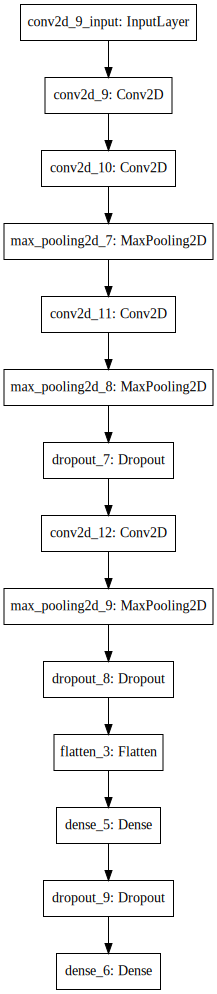

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [38]:
from keras.models import load_model
import h5py
model.save('../models/OCRV3model.h5')  # creates a HDF5 file 'my_model.h5'

In [5]:
imageInput = []
coll = io.ImageCollection('../Datav2/test/*.tif')
for img in coll:
    #img = localizeWord(img)
    imageInput.append(resize(img,(len(img),len(img[0]),1)))
print(len(imageInput[0][0]))

NameError: name 'io' is not defined

In [113]:
def imageSlice(img,startColumnIndex,endColumnIndex,startRow,endRow):
    slice = []
    print(startColumnIndex,endColumnIndex)
    print(startRow,endRow)
    for i in range(startRow,endRow):
        slice.append(np.array(img[i][startColumnIndex:endColumnIndex+1]))
    return np.array(slice);


In [114]:
imageSplits = []
started = False
startIndex = 0
for j in range(len(imageInput[0][0])-2,0,-1):
    sum = 0
    
    for i in range(len(imageInput[0])):
        sum = sum +imageInput[0][i][j][0]
    if sum >= len(imageInput[0])-3:# threshold
        if started == False:
            started = True
            startIndex = j
        elif started == True:
            if startIndex-j < 2: # threshold of column pixels of zeros
                startIndex = j
            else:
                print("test",j)
                slice = imageSlice(imageInput[0],j,startIndex,0,len(imageInput[0]))
                imageSplits.append(slice)
                started = False

            
print(len(imageSplits))


test 177
177 429
0 188
1


In [115]:
# padding array
padding = []
row = []
for i in range(30):
    row.append([1])

for i in range(len(imageInput[0])):
    padding.append(row)
    
padding = np.array(padding)
print(padding.shape)

(188, 30, 1)


c:\users\mohamed atta\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


hundered
0 hundered 21 [0.99551624] [21]


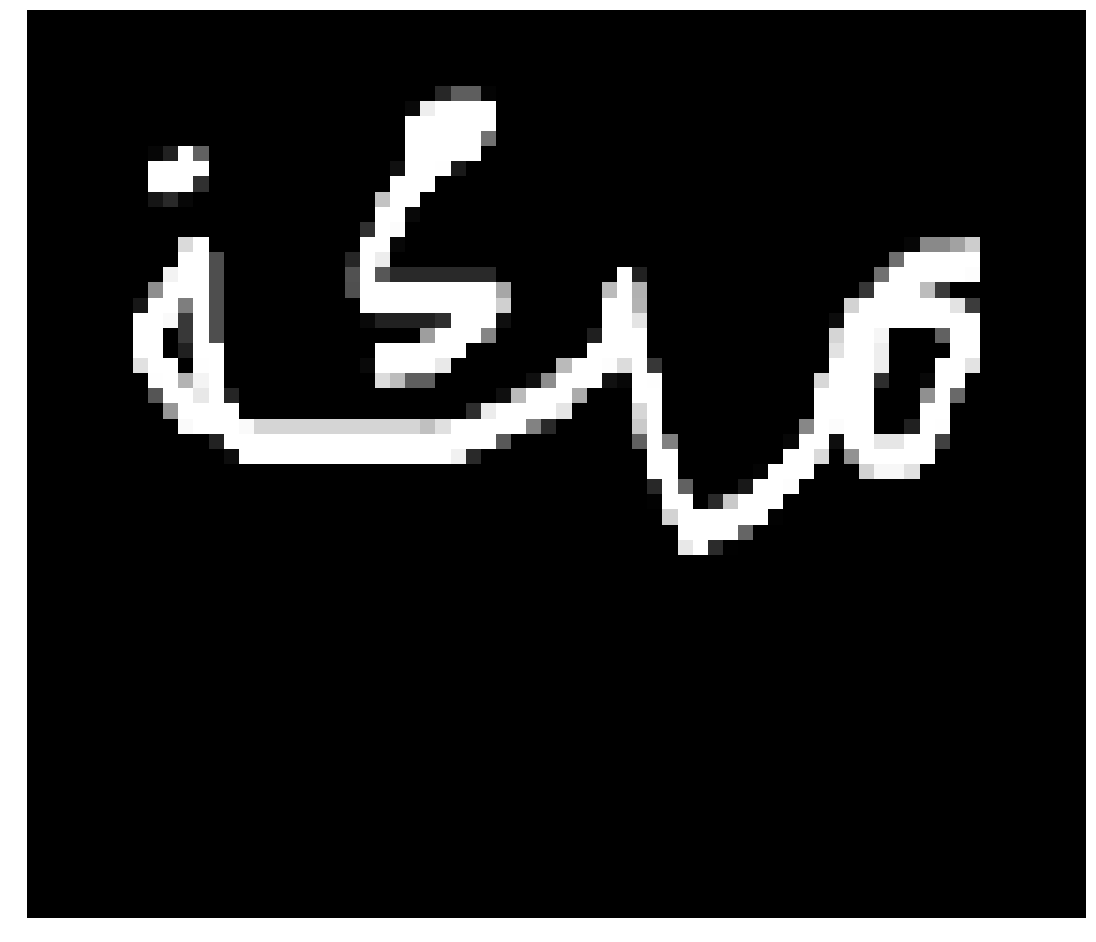

In [116]:
# Recognition algorithm
i = 0
while i < len(imageSplits):
    splitsTest = []
    splitsTest.append(np.concatenate((padding,np.concatenate((imageSplits[i],padding),axis = 1)),axis = 1))
    indecesOfMax  = []
    maxProbabilities = []
    for j in range(min(3,len(imageSplits)-i-1)):
        splitsTest.append(np.concatenate((np.concatenate((imageSplits[j+i+1],padding),axis = 1),splitsTest[-1]),axis = 1))
    
    for m in range(len(splitsTest)):
        #img = localizeWord(img)
        splitsTest[m] = resize(splitsTest[m],(60,70,1))
    modelInput = np.array(splitsTest)
    arr = model.predict( modelInput, batch_size=None, verbose=0, steps=None)
    for n in range(len(arr)):
        indecesOfMax.append(np.argmax(np.array(arr[n])))
        maxProbabilities.append(np.max(np.array(arr[n])))
        print(image_coll[np.argmax(np.array(arr[n]))])
    print(np.argmax(maxProbabilities),image_coll[indecesOfMax[np.argmax(maxProbabilities)]],indecesOfMax[np.argmax(maxProbabilities)],maxProbabilities,indecesOfMax)
    i = i + np.argmax(maxProbabilities) + 1
    samples = modelInput
    plt.figure(figsize=(60,70))
    for s in range(samples.shape[0]):
        plt.subplot(4,4,s+1)
        img = samples[s,:,:,0]
        plt.imshow(img,interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [277]:

        
for i in range(len(imageSplits)):
    #img = localizeWord(img)
    imageSplits[i] = resize(imageSplits[i],(100,120,1))
print(imageSplits[0].shape)
imageSplits = np.array(imageSplits)
print(len(imageSplits))
        

c:\users\mohamed atta\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(100, 120, 1)
10


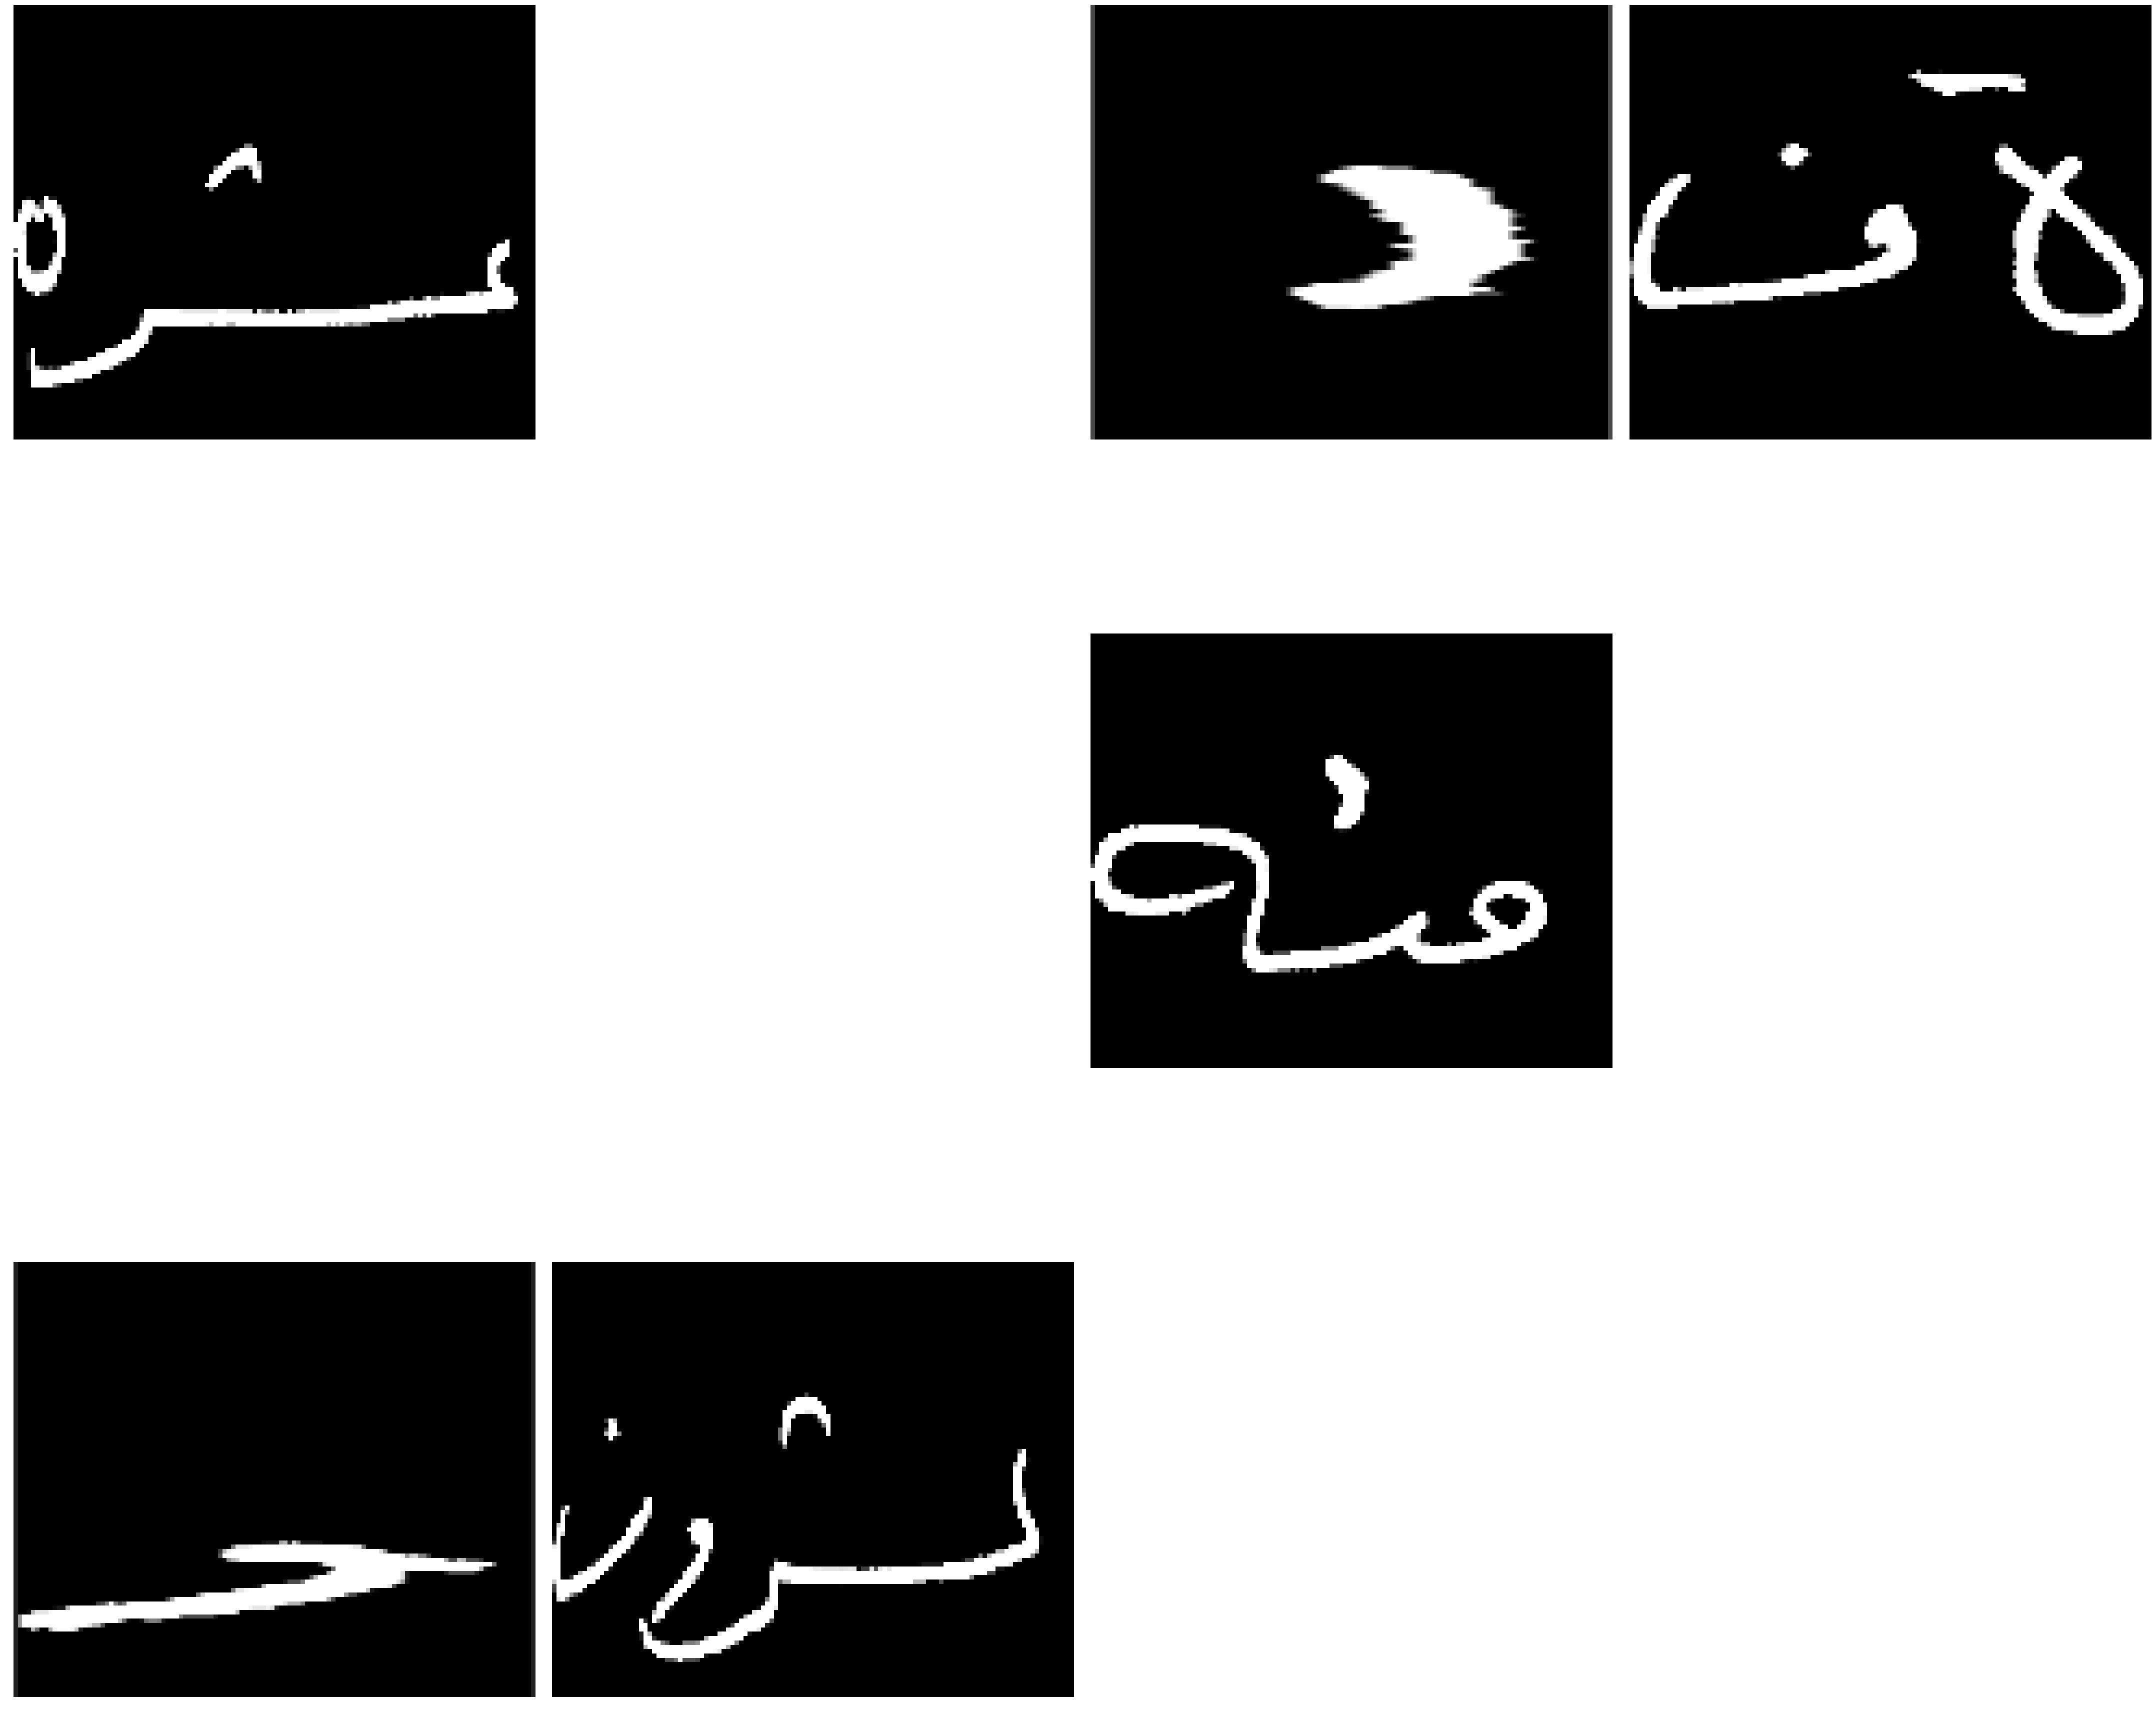

In [278]:
samples = imageSplits
plt.figure(figsize=(60,70))
for i in range(samples.shape[0]):
    plt.subplot(4,4,i+1)
    img = samples[i,:,:,0]
    plt.imshow(img,interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.tight_layout()
plt.show()
